In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from nilearn import image, datasets, input_data
import nibabel as nib

C:\Users\hennecol\AppData\Local\Temp\ipykernel_16588\1897705816.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [1]:
#List of the subjects' numbers
subject_numbers = [3,5,6,7,8]

fmri_file_paths= {}
for i in subject_numbers:
    fmri_file_paths[f'fmri_file_paths_0{i}']= [f'C:/Users/hennecol/Documents/FMRI experiment/FINAL FOLDER/BOLD_DATA/BIDS/sub-0{i}/func/sub-0{i}_task-carrsq_run-1_bold.nii.gz', f'C:/Users/hennecol/Documents/FMRI experiment/FINAL FOLDER/BOLD_DATA/BIDS/sub-0{i}/func/sub-0{i}_task-carrsq_run-2_bold.nii.gz']
fmri_file_paths

{'fmri_file_paths_03': ['C:/Users/hennecol/Documents/FMRI experiment/FINAL FOLDER/BOLD_DATA/BIDS/sub-03/func/sub-03_task-carrsq_run-1_bold.nii.gz',
  'C:/Users/hennecol/Documents/FMRI experiment/FINAL FOLDER/BOLD_DATA/BIDS/sub-03/func/sub-03_task-carrsq_run-2_bold.nii.gz'],
 'fmri_file_paths_05': ['C:/Users/hennecol/Documents/FMRI experiment/FINAL FOLDER/BOLD_DATA/BIDS/sub-05/func/sub-05_task-carrsq_run-1_bold.nii.gz',
  'C:/Users/hennecol/Documents/FMRI experiment/FINAL FOLDER/BOLD_DATA/BIDS/sub-05/func/sub-05_task-carrsq_run-2_bold.nii.gz'],
 'fmri_file_paths_06': ['C:/Users/hennecol/Documents/FMRI experiment/FINAL FOLDER/BOLD_DATA/BIDS/sub-06/func/sub-06_task-carrsq_run-1_bold.nii.gz',
  'C:/Users/hennecol/Documents/FMRI experiment/FINAL FOLDER/BOLD_DATA/BIDS/sub-06/func/sub-06_task-carrsq_run-2_bold.nii.gz'],
 'fmri_file_paths_07': ['C:/Users/hennecol/Documents/FMRI experiment/FINAL FOLDER/BOLD_DATA/BIDS/sub-07/func/sub-07_task-carrsq_run-1_bold.nii.gz',
  'C:/Users/hennecol/Docume

Extracting raw time series : 248832 voxels

In [3]:
img1 = nib.load(fmri_file_paths['fmri_file_paths_05'][0])
img2 = nib.load(fmri_file_paths['fmri_file_paths_05'][1])
data1 = img1.get_fdata()
data2 = img2.get_fdata()

In [4]:
print(data1.shape, data2.shape )

(72, 72, 48, 799) (72, 72, 48, 758)


In [5]:
a = 72*72*48
a

248832

Test with PCA to reduce dimensionnality

In [6]:
import nibabel as nib
import numpy as np
from sklearn.decomposition import PCA

def apply_pca_to_fmri(run1_path, run2_path, n_components=100):
    """
    Applique PCA aux données fMRI combinées de deux runs.

    Args:
    run1_path (str): Chemin vers le fichier NIfTI du premier run.
    run2_path (str): Chemin vers le fichier NIfTI du deuxième run.
    n_components (int): Nombre de composantes principales à extraire.

    Returns:
    pca_data (numpy.ndarray): Les scores PCA des données combinées.
    pca_model (PCA): L'objet PCA après ajustement.
    """
    # Charger les données
    img_run1 = nib.load(run1_path)
    data_run1 = img_run1.get_fdata()

    img_run2 = nib.load(run2_path)
    data_run2 = img_run2.get_fdata()

    # Vérifier que les dimensions spatiales sont les mêmes
    assert data_run1.shape[:-1] == data_run2.shape[:-1], "Les dimensions spatiales des deux runs doivent être identiques."

    # Concaténer les données le long de l'axe du temps
    combined_data = np.concatenate((data_run1, data_run2), axis=3)

    # Réorganiser les données: de (X, Y, Z, Temps) à (Temps, X*Y*Z)
    n_x, n_y, n_z, n_t = combined_data.shape
    combined_data_reshaped = combined_data.reshape(n_x * n_y * n_z, n_t).T

    # Appliquer PCA
    pca = PCA(n_components=n_components)
    pca_data = pca.fit_transform(combined_data_reshaped)

    return pca_data, pca

In [7]:
pca_results, pca_model = apply_pca_to_fmri(fmri_file_paths['fmri_file_paths_03'][0], fmri_file_paths['fmri_file_paths_03'][1], 100)
print("Variance expliquée par chaque composante:")
print(pca_model.explained_variance_ratio_)

print("Variance expliquée cumulée:")
print(np.cumsum(pca_model.explained_variance_ratio_))

Variance expliquée par chaque composante:
[4.73279484e-01 1.05712139e-01 5.33647580e-02 3.91496541e-02
 3.81157767e-02 1.52950541e-02 1.30547757e-02 1.25975844e-02
 1.05786936e-02 9.56087421e-03 8.47700451e-03 6.07856278e-03
 4.99841246e-03 4.82712431e-03 4.36472977e-03 3.79714489e-03
 3.51930710e-03 2.84654622e-03 2.74092474e-03 2.56872889e-03
 2.46086484e-03 2.34807618e-03 2.30950220e-03 2.13727413e-03
 2.04261522e-03 1.90181517e-03 1.79949187e-03 1.62992499e-03
 1.54816055e-03 1.51455595e-03 1.35357945e-03 1.30269246e-03
 1.17109795e-03 1.14343029e-03 1.10012372e-03 1.06624823e-03
 1.00716341e-03 9.78417925e-04 9.13028528e-04 8.95361743e-04
 8.79300825e-04 8.54824593e-04 8.44189627e-04 7.83304010e-04
 7.50927277e-04 7.45534596e-04 7.32420264e-04 7.02542990e-04
 6.74159862e-04 6.57153920e-04 6.21505435e-04 5.95573602e-04
 5.91297347e-04 5.76979166e-04 5.71782977e-04 5.49727469e-04
 5.45485847e-04 5.19354043e-04 5.06505861e-04 5.02455701e-04
 4.92034118e-04 4.83583893e-04 4.68923514e-

In [8]:
time_series_pca ={}
for i in subject_numbers:
    pca_results, pca_model = apply_pca_to_fmri(fmri_file_paths[f'fmri_file_paths_0{i}'][0], fmri_file_paths[f'fmri_file_paths_0{i}'][1], 10)
    time_series_pca[f'time_series_pca_0{i}'] = pca_results

In [9]:
time_series_pca['time_series_pca_03'].shape

(1570, 10)

In [10]:
def combine_events(num_sub):
    # Charger les fichiers events.tsv
    events1 = pd.read_csv(f'C:/Users/hennecol/Documents/FMRI experiment/FINAL FOLDER/2 analysis and first preprocessing/events/events_class/sub_0{num_sub}-run1_class2.tsv', sep='\t')
    events2 = pd.read_csv(f'C:/Users/hennecol/Documents/FMRI experiment/FINAL FOLDER/2 analysis and first preprocessing/events/events_class/sub_0{num_sub}-run2_class2.tsv', sep='\t')

    # Calculer le temps total écoulé jusqu'à la fin du premier run
    # Cela est égal à l'`onset` du dernier événement plus sa `duration`
    total_time_elapsed = events1['onset'].iloc[-1] + events1['duration'].iloc[-1]

    # Ajouter ce temps total écoulé aux `onset` du second run
    events2['onset'] += total_time_elapsed


    # Concaténer les fichiers
    events_combined = pd.concat([events1, events2], ignore_index=True)
    
    return events_combined

In [11]:
events = {}
for i in subject_numbers:
    events[f'events_combined_0{i}'] = combine_events(i)
events

{'events_combined_03':         type    onset    class  duration  nb_images
 0    control     0.00      NaN      7.00          7
 1    NonRisk     7.00       no     24.67         25
 2    control    31.67      NaN      8.00          8
 3    NonRisk    39.67       no     13.83         14
 4    control    53.50      NaN      8.00          8
 ..       ...      ...      ...       ...        ...
 169  NonRisk  1503.79       no      5.40          5
 170     Risk  1509.19  vehicle      2.70          3
 171  control  1511.89      NaN      8.00          8
 172  NonRisk  1519.89       no     12.63         13
 173  control  1532.52      NaN      8.00          8
 
 [174 rows x 5 columns],
 'events_combined_05':         type    onset    class  duration  nb_images
 0    control     0.00      NaN      7.00          7
 1    NonRisk     7.00       no     24.67         25
 2    control    31.67      NaN      8.00          8
 3    NonRisk    39.67       no     13.83         14
 4    control    53.50      

In [12]:
events['events_combined_03']

,type,onset,class,duration,nb_images
0,control,0.00,NaN,7.00,7
1,NonRisk,7.00,no,24.67,25
2,control,31.67,NaN,8.00,8
3,NonRisk,39.67,no,13.83,14
4,control,53.50,NaN,8.00,8
...,...,...,...,...,...
169,NonRisk,1503.79,no,5.40,5
170,Risk,1509.19,vehicle,2.70,3
171,control,1511.89,NaN,8.00,8
172,NonRisk,1519.89,no,12.63,13


In [13]:
TR = 1  # Temps de répétition en secondes, ajustez selon vos données
delay_seconds = 8  # Délai pour voir l'effet des stimulations Risk
delay_points = delay_seconds / TR  # Nombre de points de données correspondant au délai


def create_df(num_sub):

    n_timestamps, n_rois = time_series_pca[f'time_series_pca_0{num_sub}'].shape

    # Initialiser une liste pour stocker les caractéristiques extraites de chaque segment pour chaque ROI
    time_series_per_roi = {roi: [] for roi in range(n_rois)}  # Un dictionnaire pour chaque ROI

    # Initialisation de la liste pour stocker les caractéristiques et les étiquettes
    labels = []
    types =[]

    # Parcourir chaque segment pour extraire les caractéristiques
    for _, row in events[f'events_combined_0{num_sub}'].iterrows():
        onset_time = row['onset']
        duration = row['duration']
        trial_type = row['type']
        class_ = row['class']

        # if trial_type == 'Risk':
        #     adjusted_onset_time = onset_time + delay_seconds
        # else:
        #     adjusted_onset_time = onset_time
        adjusted_onset_time = onset_time + delay_seconds

        #adjusted_onset_time = onset_time
        start_index = int(adjusted_onset_time / TR)  # Convertir onset en indice de point de données
        end_index = start_index + int(row['nb_images'])  # Déterminer l'indice de fin du segment
        
        for roi in range(n_rois):
        # Extraire le segment de la série temporelle
            segment = time_series_pca[f'time_series_pca_0{num_sub}'][start_index:end_index,roi]
            time_series_per_roi[roi].append(segment)

        types.append(trial_type)
        labels.append(class_)

    # Convertir les listes en arrays numpy pour l'analyse ultérieure
    labels = np.array(labels)
    df_roi = pd.DataFrame(time_series_per_roi)
    types = np.array(types)

    mask = (types == 'Risk') | (types == 'NonRisk')
    filtered_labels = labels[mask]
    filtered_df = df_roi[mask]

    return filtered_df, filtered_labels




In [14]:
labels = create_df(3)[1]


In [15]:
# Utiliser np.unique pour obtenir les valeurs uniques et leur fréquence
unique, counts = np.unique(labels, return_counts=True)

# Création d'un dictionnaire à partir des types uniques et de leur compte
type_counts = dict(zip(unique, counts))

# Affichage du dictionnaire
print(type_counts)

{'no': 71, 'tree': 1, 'two other cars': 1, 'vehicle': 22, 'vulnerable user': 7}


In [16]:
dict_df = {}
for i in subject_numbers:
    dict_df[f'sub_0{i}'] = create_df(i)

In [17]:
dict_df

{'sub_03': (                                                     0  \
  1    [7135.591625814173, 6921.205924789028, 7272.72...   
  3    [8119.995142515924, 8532.206619355813, 8818.52...   
  5    [8991.928409071386, 9515.639149217202, 9426.13...   
  6    [9052.781681390341, 9699.513134672616, 9830.61...   
  8    [9561.160668351346, 8729.05710235939, 8986.839...   
  ..                                                 ...   
  165  [-3673.5475821505884, -3837.229060659239, -458...   
  167  [-4052.0792312688045, -4168.243124588316, -363...   
  169  [-2520.6836766957254, -3555.1025740948235, -34...   
  170  [-3929.7888348914503, -3920.858787769683, -347...   
  172  [-3838.5853178184393, -3601.9462860544063, -46...   
  
                                                       1  \
  1    [-590.8638421097536, -1002.7503430476263, -969...   
  3    [-1908.3629361619714, -1725.465239082554, -146...   
  5    [-1689.6777700425407, -1359.079626171596, -147...   
  6    [-1611.1977826752263

In [18]:
# Utiliser np.unique pour obtenir les valeurs uniques et leur fréquence
unique, counts = np.unique(dict_df['sub_06'][1], return_counts=True)

# Création d'un dictionnaire à partir des types uniques et de leur compte
type_counts = dict(zip(unique, counts))

# Affichage du dictionnaire
print(type_counts)

{'no': 75, 'tree': 1, 'two other cars': 3, 'vehicle': 21, 'vulnerable user': 7}


First LSTM model:

In [19]:
import numpy as np
import pandas as pd

def zero_pad(data_dict):
    padded_dict = {}
    for key, value in data_dict.items():
        data, labels = value

        # Trouver la longueur maximale de séquence dans ce sujet
        max_length = max(data.applymap(len).max())

        # Padding
        padded_data = data.applymap(lambda x: np.pad(x, (0, max_length - len(x)), 'constant'))
        
        padded_dict[key] = (padded_data, labels)

        
    return padded_dict



In [20]:
def normalize(df):
    # Extraire toutes les séquences du DataFrame dans un seul grand tableau
    all_data = np.concatenate(df.applymap(np.array).values.ravel())
    
    # Calculer la moyenne et l'écart-type globaux
    global_mean = np.mean(all_data)
    global_std = np.std(all_data)
    
    # Fonction pour normaliser une séquence
    def normalize_sequence(sequence):
        return (sequence - global_mean) / global_std
    
    # Appliquer la normalisation à chaque séquence dans le DataFrame
    df_normalized = df.applymap(normalize_sequence)
    
    return df_normalized

In [21]:
dict_df_norm = {}
for key, value in dict_df.items():
    df_norm_pad = normalize(value[0])
    dict_df_norm[key] = [df_norm_pad, value[1]]

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\666322949.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  all_data = np.concatenate(df.applymap(np.array).values.ravel())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\666322949.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_normalized = df.applymap(normalize_sequence)


In [22]:
dict_df_norm_pad = zero_pad(dict_df_norm)

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\3936950305.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  max_length = max(data.applymap(len).max())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\3936950305.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  padded_data = data.applymap(lambda x: np.pad(x, (0, max_length - len(x)), 'constant'))


In [23]:
#Normalize without padding
dict_df_norm = {}
for key, value in dict_df.items():
    df_norm = normalize(value[0])
    dict_df_norm[key] = [df_norm, value[1]]

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\666322949.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  all_data = np.concatenate(df.applymap(np.array).values.ravel())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\666322949.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_normalized = df.applymap(normalize_sequence)


In [24]:
dict_df_norm_pad['sub_08'][1]

array(['no', 'no', 'no', 'vulnerable user', 'no', 'no', 'no', 'vehicle',
       'no', 'vehicle', 'no', 'no', 'no', 'no', 'vulnerable user', 'no',
       'vehicle', 'no', 'no', 'no', 'no', 'vulnerable user', 'no',
       'vulnerable user', 'no', 'no', 'vulnerable user', 'no', 'no',
       'vehicle', 'no', 'vehicle', 'no', 'no', 'vehicle', 'no', 'no',
       'vehicle', 'no', 'no', 'tree', 'no', 'vehicle', 'no', 'no',
       'vehicle', 'no', 'vehicle', 'no', 'vehicle', 'no', 'no', 'no',
       'no', 'two other cars', 'no', 'no', 'no', 'no', 'vehicle', 'no',
       'vehicle', 'no', 'vehicle', 'no', 'no', 'no', 'vehicle', 'no',
       'vulnerable user', 'no', 'vehicle', 'no', 'vehicle', 'no',
       'two other cars', 'no', 'vehicle', 'no', 'no', 'no',
       'two other cars', 'no', 'no', 'vulnerable user', 'no', 'no', 'no',
       'no', 'no', 'vehicle', 'no', 'vehicle', 'no', 'vehicle', 'no',
       'no', 'no', 'no', 'no', 'no', 'vehicle', 'no', 'vehicle', 'no',
       'no', 'vehicle', 'no'

In [25]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, accuracy_score


def train_lstm_model(data):
    df_input, df_output = data
    n_timesteps = len(df_input.iloc[0,0])
    n_features = df_input.shape[1]
    
    # Reshape et préparation de l'entrée X
    X = np.array(df_input.applymap(np.array).values.tolist())
    X = X.reshape(-1, n_timesteps, n_features)

    # Encodage des labels de sortie
    le = LabelEncoder()
    y_encoded = le.fit_transform(df_output)
    y_categorical = to_categorical(y_encoded)  # Conversion en format catégoriel pour le softmax

    # Séparation des données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

    # Fonction pour convertir les labels catégoriels en labels originaux et compter les occurrences
    def count_labels(y):
        labels = np.argmax(y, axis=1)  # Convertir de one-hot à labels originaux
        label_counts = np.unique(labels, return_counts=True)
        class_counts = {le.classes_[i]: count for i, count in zip(label_counts[0], label_counts[1])}
        return class_counts

    # Compter et afficher les occurrences pour chaque ensemble
    y_train_counts = count_labels(y_train)
    y_test_counts = count_labels(y_test)
    y_val_counts = count_labels(y_val)

    print("y_train counts:", y_train_counts)
    print("y_test counts:", y_test_counts)
    print("y_val counts:", y_val_counts)


    early_stopping_monitor = EarlyStopping(
    monitor='val_loss',     # Surveiller la perte de validation
    min_delta=0.001,        # Minimum de changement pour qualifier une amélioration
    patience=15,            # Nombre d'epochs à attendre après une amélioration
    verbose=1,              # Afficher les messages de progression
    mode='auto',            # 'auto', 'min', 'max' - inférer le meilleur moment pour stopper
    restore_best_weights=True  # Restaurer les poids du meilleur modèle trouvé
)

    # Création du modèle LSTM
    model = Sequential([
        LSTM(50, input_shape=(n_timesteps, n_features), return_sequences=True),
        Dropout(0.2),
        LSTM(50),
        Dropout(0.2),
        Dense(np.max(y_encoded) + 1, activation='softmax')  ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Entraînement du modèle
    model.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val), batch_size=32, callbacks=[early_stopping_monitor])
    #model.fit(X_train, y_train, epochs =100, batch_size =32)

     # Prédiction sur l'ensemble de test et calcul de l'accuracy
    y_pred_prob = model.predict(X_test)
    y_pred_labels = np.argmax(y_pred_prob, axis=1)
    y_test_labels = np.argmax(y_test, axis=1)
    accuracy = accuracy_score(y_test_labels, y_pred_labels)

    print("Test Accuracy:", accuracy)


    # Print for each class if it managed to predict or not
    # Calculer la matrice de confusion
    cm = confusion_matrix(y_test_labels, y_pred_labels)

    print(cm)

    # Obtenir les étiquettes de classe à partir de l'encodeur
    class_labels = le.classes_  # le est votre LabelEncoder

    # Initialisation du dictionnaire pour stocker les résultats
    correct_counts = {label: 0 for label in class_labels}
    total_counts = {label: 0 for label in class_labels}

    # Compter les totaux et les corrects pour chaque classe
    for true_label, pred_label in zip(y_test_labels, y_pred_labels):
        true_class = class_labels[true_label]
        total_counts[true_class] += 1
        if true_label == pred_label:
            correct_counts[true_class] += 1

    # Calculer les fractions de corrects/totaux pour chaque classe
    accuracy_dict = {label: f"{correct_counts[label]}/{total_counts[label]}" for label in class_labels}

    print("Accuracy for each class:", accuracy_dict)
    
    return accuracy

In [26]:
train_lstm_model(dict_df_norm_pad['sub_08'])

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2751895612.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = np.array(df_input.applymap(np.array).values.tolist())
c:\Users\hennecol\Documents\FMRI experiment\FINAL FOLDER\Lucas\virtual_environnement\venv_tf\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


y_train counts: {'no': 43, 'tree': 1, 'two other cars': 2, 'vehicle': 13, 'vulnerable user': 5}
y_test counts: {'no': 15, 'two other cars': 1, 'vehicle': 5, 'vulnerable user': 1}
y_val counts: {'no': 15, 'vehicle': 6, 'vulnerable user': 1}
Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 354ms/step - accuracy: 0.1979 - loss: 1.6100 - val_accuracy: 0.6364 - val_loss: 1.5918
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5521 - loss: 1.5882 - val_accuracy: 0.6818 - val_loss: 1.5730
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6458 - loss: 1.5639 - val_accuracy: 0.6364 - val_loss: 1.5495
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6771 - loss: 1.5373 - val_accuracy: 0.6364 - val_loss: 1.5178
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6458 - loss: 1.5056 - val_accuracy: 0.6818 - val_loss: 1.4726
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6354 - loss: 1.4459 - val_accuracy: 0.6818 - val_loss: 1.4055
Epo

0.6818181818181818

In [27]:
len(dict_df_norm['sub_08'][0].iloc[1,0])

14

In [28]:
#Test without padding

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, RaggedToDense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, accuracy_score
import tensorflow as tf

def train_lstm_model(data):
    df_input, df_output = data
    
    # Convert each entry in df_input to an array if not already
    X = [tf.ragged.constant(row.apply(np.array).tolist()) for index, row in df_input.iterrows()]

    # Convert list of RaggedTensors into a single RaggedTensor
    X = tf.ragged.stack(X)
    
    # Encode the output labels
    le = LabelEncoder()
    y_encoded = le.fit_transform(df_output)
    y_categorical = to_categorical(y_encoded)  # Convert to categorical format for softmax

    # Generate indices for splitting data
    indices = tf.range(start=0, limit=tf.shape(X)[0], dtype=tf.int32)
    shuffled_indices = tf.random.shuffle(indices)

    # Calculate number of training samples
    train_size = int(0.8 * int(tf.shape(X)[0]))

    # # Split data into training and testing
    # train_indices = shuffled_indices[:train_size]
    # test_indices = shuffled_indices[train_size:]

    # X_train = tf.gather(X, train_indices)
    # X_test = tf.gather(X, test_indices)
    # y_train = tf.gather(y_categorical, train_indices)
    # y_test = tf.gather(y_categorical, test_indices)

    # feature_dim = X_train[0][0].shape[-1]  # Make sure this is defined

    # Create and configure the LSTM model
    model = Sequential([
        RaggedToDense(50),
        LSTM(50, return_sequences=True),
        Dropout(0.2),
        LSTM(50),
        Dropout(0.2),
        Dense(y_categorical.shape[1], activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Early stopping to prevent overfitting
    early_stopping_monitor = EarlyStopping(
        monitor='val_loss',     
        min_delta=0.001,        
        patience=15,            
        verbose=1,              
        mode='auto',            
        restore_best_weights=True
    )

    # Train the model with a batch size of 1
    model.fit(X, y_categorical, epochs=200, batch_size=1, validation_split=0.25, callbacks=[early_stopping_monitor])

    # Predict on the test set and calculate accuracy
    # y_pred_prob = model.predict(X_test)
    # y_pred_labels = np.argmax(y_pred_prob, axis=1)
    # y_test_labels = np.argmax(y_test, axis=1)
    # accuracy = accuracy_score(y_test_labels, y_pred_labels)

    # print("Test Accuracy:", accuracy)

    # # Calculate confusion matrix
    # cm = confusion_matrix(y_test_labels, y_pred_labels)
    # print("Confusion Matrix:\n", cm)

    # # Calculate accuracy per class
    # class_labels = le.classes_  # LabelEncoder instance
    # correct_counts = {label: 0 for label in class_labels}
    # total_counts = {label: 0 for label in class_labels}

    # for true_label, pred_label in zip(y_test_labels, y_pred_labels):
    #     true_class = class_labels[true_label]
    #     total_counts[true_class] += 1
    #     if true_label == pred_label:
    #         correct_counts[true_class] += 1

    # accuracy_dict = {label: f"{correct_counts[label]}/{total_counts[label]}" for label in class_labels}
    # print("Accuracy for each class:", accuracy_dict)

    #return accuracy

ImportError: cannot import name 'RaggedToDense' from 'tensorflow.keras.layers' (c:\Users\hennecol\Documents\FMRI experiment\FINAL FOLDER\Lucas\virtual_environnement\venv_tf\Lib\site-packages\keras\_tf_keras\keras\layers\__init__.py)

In [ ]:
train_lstm_model(dict_df_norm['sub_08'])

X shape: (108, None, None), y shape: (108, 7)
Epoch 1/200


c:\Users\hennecol\Documents\FMRI experiment\FINAL FOLDER\Lucas\virtual_environnement\venv_tf\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: Exception encountered when calling LSTM.call().

[1mIndex 1 is not uniform[0m

Arguments received by LSTM.call():
  • sequences=tf.Tensor(shape=(None, None, None), dtype=float32)
  • initial_state=None
  • mask=None
  • training=True

Test with 1 global model, leave one out method

In [29]:
import numpy as np
import pandas as pd

def zero_pad_tot(data_dict):
    # Identifier la longueur maximale globale
    global_max_length = max(max(data.applymap(len).max()) for data, _ in data_dict.values())

    padded_dict = {}
    for key, (data, labels) in data_dict.items():
        # Padding chaque série temporelle pour atteindre la longueur maximale globale
        padded_data = data.applymap(lambda x: np.pad(x, (0, global_max_length - len(x)), 'constant', constant_values=0))
        
        padded_dict[key] = (padded_data, labels)

    return padded_dict

In [30]:
dict_df_norm_pad_tot = zero_pad_tot(dict_df_norm)
# for key, value in dict_df_padded_tot.items():
#     df_norm_pad_tot = normalize(value[0])
#     dict_df_norm_pad_tot[key] = [df_norm_pad_tot, value[1]]

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\1415118670.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  global_max_length = max(max(data.applymap(len).max()) for data, _ in data_dict.values())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\1415118670.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  padded_data = data.applymap(lambda x: np.pad(x, (0, global_max_length - len(x)), 'constant', constant_values=0))


In [37]:
dict_df_norm_pad_tot['sub_03'][0].iloc[0,0]

array([3.36007294, 3.25902413, 3.42471067, 3.68497972, 3.69233917,
       3.39192441, 3.34226992, 3.60081862, 3.72552289, 3.60156597,
       3.43645257, 3.59440937, 3.67095031, 3.40168857, 3.35770933,
       3.34886815, 3.55819087, 3.50518842, 3.46980794, 3.49975852,
       3.79060573, 3.73995985, 3.65255295, 3.65079415, 3.65086539,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [61]:
# Concaténer toutes les données dans une seule matrice X et un vecteur y
X_total = pd.concat([dict_df_norm_pad_tot[sub][0] for sub in dict_df_norm_pad_tot], axis=0)
y_total = np.concatenate([dict_df_norm_pad_tot[sub][1] for sub in dict_df_norm_pad_tot], axis=0)

#Reset indexes
X_total = X_total.reset_index(drop=True)


In [62]:
#Number of examples in each class
unique, count = np.unique(y_total, return_counts=True)
class_dict = dict(zip(unique, count))
class_dict

{'no': 368,
 'tree': 5,
 'two other cars': 9,
 'vehicle': 114,
 'vulnerable user': 35}

In [63]:
indices = np.concatenate([[i] * len(dict_df_norm_pad_tot[sub][1]) for i, sub in enumerate(dict_df_norm_pad_tot)])
indices

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [64]:
len(y_total)

531

In [121]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split, LeaveOneOut
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dropout, Dense, concatenate, Masking

def train_lstm_model_loo(X_total, y_total, num_sub, num_epochs, indices):
    '''
    X_total : dataframe which contains the time series 
    y_total : array which contains the classes associated with the time series
    num_sub : number of the subject used as test set
    num_epochs : number of epochs for training
    indices : indices of the lines of X_total corresponding to each subject
    '''
    
    # Récupération des indices des observations pour chaque sujet
    sub_indices = {sub: i for i, sub in enumerate([3, 5, 6, 7, 8])}
    test_sub = sub_indices[num_sub]

    # Préparation des données d'entrée
    n_timesteps = len(X_total.iloc[0, 0])
    n_features = X_total.shape[1]
    
    # Reshape des données d'entrée
    X = np.array(X_total.applymap(np.array).values.tolist())
    X = X.reshape(-1, n_timesteps, n_features)
    
    # Encodage des labels de sortie
    le = LabelEncoder()
    y_encoded = le.fit_transform(y_total)
    y_categorical = to_categorical(y_encoded)  # Conversion en format catégoriel pour le softmax
    

    # Définir l'index pour le test et l'entraînement en utilisant les indices préparés
    X_train, X_test = X[indices != test_sub], X[indices == test_sub]
    y_train, y_test = y_categorical[indices != test_sub], y_categorical[indices == test_sub]

    # # Création du modèle LSTM
    # model = Sequential([
    #     LSTM(50, input_shape=(n_timesteps, n_features), return_sequences=True),
    #     Dropout(0.2),
    #     LSTM(50),
    #     Dropout(0.2),
    #     Dense(len(np.unique(y_encoded)), activation='softmax')
    # ])



    #Model with skip connections:
    input_tensor = Input(shape=(n_timesteps, n_features))
    x = Masking(mask_value=0.0)(input_tensor) #Masking layer to ignore the 0. introduced with padding
    x = LSTM(50, return_sequences=True)(x)
    x = Dropout(0.2)(x)
    x2 = LSTM(50)(x)
    x2 = Dropout(0.2)(x2)
    x1 = Dense(50, activation='relu')(x[:, -1, :])  # Utilisation de la dernière sortie du premier LSTM, Connexion directe depuis la sortie du premier LSTM 
    concat = concatenate([x1, x2])

    # Couche Dense finale pour la classification
    output_tensor = Dense(len(np.unique(y_encoded)), activation='softmax')(concat)

    # Création du modèle
    model = Model(inputs=input_tensor, outputs=output_tensor)
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Configuration de l'arrêt précoce
    early_stopping_monitor = EarlyStopping(
        monitor='val_loss',
        min_delta=0.001,
        patience=10,
        verbose=1,
        mode='auto',
        restore_best_weights=True
    )


    # Entraînement du modèle avec validation sur une fraction des données d'entraînement
    #X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Fonction pour convertir les labels catégoriels en labels originaux et compter les occurrences
    def count_labels(y):
        labels = np.argmax(y, axis=1)  # Convertir de one-hot à labels originaux
        label_counts = np.unique(labels, return_counts=True)
        class_counts = {le.classes_[i]: count for i, count in zip(label_counts[0], label_counts[1])}
        return class_counts

    # Compter et afficher les occurrences pour chaque ensemble
    y_train_counts = count_labels(y_train)
    y_test_counts = count_labels(y_test)
    #y_val_counts = count_labels(y_val)

    print("y_train counts:", y_train_counts)
    print("y_test counts:", y_test_counts)
    #print("y_val counts:", y_val_counts)
    
    #model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, callbacks=[early_stopping_monitor])
    model.fit(X_train, y_train, epochs=num_epochs, batch_size=32)

         # Prédiction sur l'ensemble de test et calcul de l'accuracy
    y_pred_prob = model.predict(X_test)
    y_pred_labels = np.argmax(y_pred_prob, axis=1)
    y_test_labels = np.argmax(y_test, axis=1)
    accuracy = accuracy_score(y_test_labels, y_pred_labels)

    print("Test Accuracy:", accuracy)


    # Print for each class if it managed to predict or not
    # Calculer la matrice de confusion
    cm = confusion_matrix(y_test_labels, y_pred_labels)

    print(cm)

    # Obtenir les étiquettes de classe à partir de l'encodeur
    class_labels = le.classes_  # le est votre LabelEncoder

    # Initialisation du dictionnaire pour stocker les résultats
    correct_counts = {label: 0 for label in class_labels}
    total_counts = {label: 0 for label in class_labels}

    # Compter les totaux et les corrects pour chaque classe
    for true_label, pred_label in zip(y_test_labels, y_pred_labels):
        true_class = class_labels[true_label]
        total_counts[true_class] += 1
        if true_label == pred_label:
            correct_counts[true_class] += 1

    # Calculer les fractions de corrects/totaux pour chaque classe
    accuracy_dict = {label: f"{correct_counts[label]}/{total_counts[label]}" for label in class_labels}

    print("Accuracy for each class:", accuracy_dict)
    
    return accuracy

In [122]:
train_lstm_model_loo(X_total, y_total, 6, 30,indices)

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2486100914.py:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = np.array(X_total.applymap(np.array).values.tolist())


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (531, 11) + inhomogeneous part.

Let's try to decrease the size of the class "no" in the dataset

In [ ]:
#Creates a new dictionary with half of the "no" class removed for all subjects
dict_df_norm_pad_half = {}
for key, value in dict_df_norm_pad_tot.items():
    non_risk_indices = np.where(value[1] == 'no')[0]
    np.random.shuffle(non_risk_indices)
    half_non_risk_indices = non_risk_indices[:len(non_risk_indices) // 2]
    mask2 = np.ones(len(value[1]), dtype=bool)
    mask2[half_non_risk_indices] = False
    dict_df_norm_pad_half[key] = [value[0][mask2], value[1][mask2]]


In [ ]:
# Concaténer toutes les données dans une seule matrice X et un vecteur y
X_half_no = pd.concat([dict_df_norm_pad_half[sub][0] for sub in dict_df_norm_pad_half], axis=0)
y_half_no = np.concatenate([dict_df_norm_pad_half[sub][1] for sub in dict_df_norm_pad_half], axis=0)

#Reset indexes
X_half_no = X_half_no.reset_index(drop=True)

indices_half_no = np.concatenate([[i] * len(dict_df_norm_pad_half[sub][1]) for i, sub in enumerate(dict_df_norm_pad_half)])

In [ ]:
train_lstm_model_loo(X_half_no, y_half_no, 6, 30, indices_half_no)

y_train counts: {'bicycle': 12, 'car': 85, 'no': 148, 'pedestrian': 16, 'tree': 4, 'truck': 8, 'two other cars': 6}
y_test counts: {'bicycle': 3, 'car': 19, 'no': 38, 'pedestrian': 4, 'tree': 1, 'truck': 2, 'two other cars': 3}
Epoch 1/30


C:\Users\hennecol\AppData\Local\Temp\ipykernel_14288\1662707864.py:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = np.array(X_total.applymap(np.array).values.tolist())


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3639 - loss: 1.9105
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5361 - loss: 1.7110
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5358 - loss: 1.2956
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5089 - loss: 1.2318
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5738 - loss: 1.1907
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5465 - loss: 1.1949
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5826 - loss: 1.0734
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6968 - loss: 1.0277
Epoch 9/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6820 - loss: 1.0325
Epoch 10/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7059 - loss: 0.9127
Epoch 11/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6426 - loss: 1.0396
Epoch 12/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6960 - loss: 0.9527
Epoch 13/30


0.6428571428571429

Let's augment the size of the minor classes

First method: simple oversampling (just copy the examples), same number for each class

In [34]:
# First method: simple oversampling, same number for each class
from imblearn.over_sampling import RandomOverSampler

num_sub = 8
sub_indices = {sub: i for i, sub in enumerate([3, 5, 6, 7, 8])}
test_sub = sub_indices[num_sub]
X_train, X_test = X_total[indices != test_sub], X_total[indices == test_sub]
y_train, y_test = y_total[indices != test_sub], y_total[indices == test_sub]

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
print(pd.Series(y_resampled).value_counts())


no                 295
vulnerable user    295
vehicle            295
tree               295
two other cars     295
Name: count, dtype: int64


In [76]:
X_total['indices'] = indices
X_total

,0,1,2,3,4,5,6,7,8,9,indices
0,"[3.36007293793268, 3.2590241273590763, 3.42471...","[-0.28172374556934443, -0.4758628174014436, -0...","[-0.12272417281047465, 0.23351576794583673, 0....","[1.8445885477949062, 1.9493888495739362, 2.010...","[1.8453127018041573, 2.108048719937257, 2.0110...","[-0.6081173070259163, -0.6629126243343468, -0....","[0.893068878320037, 0.34283115717227675, -0.24...","[0.7523103099266264, -0.14329233486976103, -0....","[0.11106850981377196, 0.19602374884251675, 0.1...","[0.28575258798766123, 0.38814443804946736, 0.7...",0
1,"[3.824062858955993, 4.018355105315155, 4.15330...","[-0.9027153310583517, -0.8165081136079736, -0....","[-0.4102075530984104, 0.632300290273008, 1.456...","[1.300938754951324, 0.9372476905577106, 0.9044...","[1.4217356500279825, 1.5554012567665936, 0.990...","[0.08136316914076253, 0.015675633118289803, 0....","[0.13844510600770016, 0.21457189958757703, 0.1...","[0.2339887513121257, -0.13709514850589066, 0.4...","[-0.18450438161920016, 0.053603505449511, 0.40...","[-0.10447566640945385, 0.26997358804653576, 0....",0
2,"[4.235040918890374, 4.481887360249583, 4.43969...","[-0.7996400055082228, -0.6438154843006172, -0....","[1.0020003202794108, 1.2583329671946712, -0.25...","[0.8524541164913881, 1.235233683160667, 1.3737...","[0.9780400152735358, -0.05432936602462472, -0....","[0.4090419630955311, 0.40271857845034237, 0.53...","[-0.4703504140037058, 0.09885831305400676, 0.7...","[-0.1609557448222566, 0.4745672143150703, -0.2...","[0.14959341363088038, -0.06869754090727037, 0....","[0.26411967728987135, -0.0045631537750335195, ...",0
3,"[4.263723572434608, 4.56855474262094, 4.630347...","[-0.7626491551885533, -0.5976201114378803, -0....","[-0.6191510364911302, 0.11301005578106524, 1.0...","[1.069897618038889, 0.6497459192489268, 0.3853...","[1.1030855796140746, 1.314678060744202, 1.1474...","[0.4735109384776487, 0.5117632082672118, 0.511...","[-0.19431713822138036, 0.4565391406364115, 0.2...","[0.4711539382705691, 0.20182406756547702, 0.01...","[0.012846292356959587, 0.1670582863650492, 0.5...","[-0.2676432013463181, -0.4645790050952793, 0.1...",0
4,"[4.5033435270648745, 4.111138845430443, 4.2326...","[-0.6242399738284085, -0.7387800175549103, -0....","[0.6212006064837319, -0.6723296905231652, -0.8...","[1.134810684438291, 1.2249656693782824, 0.9937...","[-0.42863003557508944, 0.17620226672859451, 0....","[0.5745173327645383, 0.43963962708027626, 0.27...","[0.6574194872300965, -0.08825641716311752, -0....","[0.32998162930316344, -0.6755167512227304, 0.2...","[0.33121245568197244, 0.3706212194808867, 0.16...","[-0.2808512534191961, 0.09396754214996321, -0....",0
...,...,...,...,...,...,...,...,...,...,...,...
526,"[-2.9443296497898843, -2.677481236511569, -2.1...","[0.595278938456523, 0.9786902345015276, 1.7531...","[1.2092187075244116, 0.9393262215141902, 0.227...","[0.4412945187328871, 0.1961280809186313, 0.773...","[-0.38642201011234883, -0.43704739786240915, -...","[-0.14567941942746468, -0.20331891632461982, -...","[-1.002997789783978, -0.742472912265527, -0.71...","[0.13533474465201803, 0.06406183285196577, -0....","[0.12879765404559168, 0.6503306894229278, -0.2...","[0.019275672288382728, 0.24682067562739585, 0....",4
527,"[-2.3104336882010945, -2.7252210373515884, -2....","[1.9226657920227872, 0.623374878487056, 0.7792...","[0.07898564213559918, 1.2519677793544013, 1.13...","[-1.2736044087912286, -1.295767128274009, -0.6...","[0.32335863419814487, -0.3922087622031861, -0....","[-0.5855702234133731, 0.03153906191220652, -0....","[0.6955465833961064, 0.14276319373739738, 0.37...","[-0.30914750877914193, -0.11717078531786386, -...","[-0.4102541521955448, -0.1966023016078334, -0....","[0.00374792235975268, -0.21598006861003036, -0...",4
528,"[-2.9551405917774742, -2.223495057001609, -1.3...","[0.6648873936776531, 1.3023172691506806, 2.029...","[1.1800952278135912, 0.6598102696231345, -0.10...","[0.10863963615035835, -0.7729341238058569, -1....","[-0.08201533136369861, 0.5918461002255

In [117]:
from tensorflow.keras.optimizers import Adam

# Same function with resampling:
def train_lstm_model_loo_full_resample(X_total, y_total, num_sub, num_epochs, lr):
    '''
    X_total : dataframe which contains the time series 
    y_total : array which contains the classes associated with the time series
    num_sub : number of the subject used as test set
    num_epochs : number of epochs for training
    indices : indices of the lines of X_total corresponding to each subject
    '''
    
    # Récupération des indices des observations pour chaque sujet
    sub_indices = {sub: i for i, sub in enumerate([3, 5, 6, 7, 8])}
    test_sub = sub_indices[num_sub]

    # Définir l'index pour le test et l'entraînement en utilisant les indices préparés
    X_train_temp, X_test_temp = X_total[X_total['indices'] != test_sub], X_total[X_total['indices'] == test_sub]
    y_train_temp, y_test_temp = y_total[X_total['indices'] != test_sub], y_total[X_total['indices'] == test_sub]

    #Drop column 'indices'
    X_train_temp = X_train_temp.drop('indices', axis=1)
    X_test_temp = X_test_temp.drop('indices', axis=1)

    #Increase the size of the training dataset 
    ros = RandomOverSampler(random_state=42)
    X_train_temp, y_train_temp = ros.fit_resample(X_train_temp, y_train_temp)
    print(pd.Series(y_train_temp).value_counts())

    
    n_timesteps = len(X_train_temp.iloc[0, 0])
    n_features = X_train_temp.shape[1]

    # Reshape of X_train
    X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
    X_train = X_train.reshape(-1, n_timesteps, n_features)


    # Reshape of X_test
    X_test = np.array(X_test_temp.applymap(np.array).values.tolist())
    X_test = X_test.reshape(-1, n_timesteps, n_features)
    
    # Encodage des labels de sortie
    le = LabelEncoder()
    le.fit(y_total)
    y_train_encoded = le.transform(y_train_temp)
    y_test_encoded = le.transform(y_test_temp)
    y_train = to_categorical(y_train_encoded)  # Conversion en format catégoriel pour le softmax
    y_test = to_categorical(y_test_encoded)

    # # Création du modèle LSTM
    # model = Sequential([
    #     LSTM(50, input_shape=(n_timesteps, n_features), return_sequences=True),
    #     Dropout(0.2),
    #     LSTM(50),
    #     Dropout(0.2),
    #     Dense(len(np.unique(y_encoded)), activation='softmax')
    # ])



    #Model with skip connections:
    input_tensor = Input(shape=(n_timesteps, n_features))
    x = Masking(mask_value=0.0)(input_tensor) #Masking layer to ignore the 0. introduced with padding
    x = LSTM(50, return_sequences=True)(x)
    x = Dropout(0.2)(x)
    x2 = LSTM(50)(x)
    x2 = Dropout(0.2)(x2)
    x1 = Dense(50, activation='relu')(x[:, -1, :])  # Utilisation de la dernière sortie du premier LSTM, Connexion directe depuis la sortie du premier LSTM 
    concat = concatenate([x1, x2])

    # Couche Dense finale pour la classification
    output_tensor = Dense(len(np.unique(y_train_encoded)), activation='softmax')(concat)

    # Création du modèle
    model = Model(inputs=input_tensor, outputs=output_tensor)
    
    learning_rate = lr
    optimizer = Adam(learning_rate=learning_rate)

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Configuration de l'arrêt précoce
    early_stopping_monitor = EarlyStopping(
        monitor='val_loss',
        min_delta=0.001,
        patience=10,
        verbose=1,
        mode='auto',
        restore_best_weights=True
    )


    # Entraînement du modèle avec validation sur une fraction des données d'entraînement
    #X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

    # Fonction pour convertir les labels catégoriels en labels originaux et compter les occurrences
    def count_labels(y):
        labels = np.argmax(y, axis=1)  # Convertir de one-hot à labels originaux
        label_counts = np.unique(labels, return_counts=True)
        class_counts = {le.classes_[i]: count for i, count in zip(label_counts[0], label_counts[1])}
        return class_counts

    # Compter et afficher les occurrences pour chaque ensemble
    y_train_counts = count_labels(y_train)
    y_test_counts = count_labels(y_test)
    #y_val_counts = count_labels(y_val)

    print("y_train counts:", y_train_counts)
    print("y_test counts:", y_test_counts)
    #print("y_val counts:", y_val_counts)
    
    #model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, callbacks=[early_stopping_monitor])gg
    model.fit(X_train, y_train, epochs=num_epochs, batch_size=32)

         # Prédiction sur l'ensemble de test et calcul de l'accuracy
    y_pred_prob = model.predict(X_test)
    y_pred_labels = np.argmax(y_pred_prob, axis=1)
    y_test_labels = np.argmax(y_test, axis=1)
    accuracy = accuracy_score(y_test_labels, y_pred_labels)

    print("Test Accuracy:", accuracy)


    # Print for each class if it managed to predict or not
    # Calculer la matrice de confusion
    cm = confusion_matrix(y_test_labels, y_pred_labels)

    print(cm)

    # Obtenir les étiquettes de classe à partir de l'encodeur
    class_labels = le.classes_  # le est votre LabelEncoder

    # Initialisation du dictionnaire pour stocker les résultats
    correct_counts = {label: 0 for label in class_labels}
    total_counts = {label: 0 for label in class_labels}

    # Compter les totaux et les corrects pour chaque classe
    for true_label, pred_label in zip(y_test_labels, y_pred_labels):
        true_class = class_labels[true_label]
        total_counts[true_class] += 1
        if true_label == pred_label:
            correct_counts[true_class] += 1

    # Calculer les fractions de corrects/totaux pour chaque classe
    accuracy_dict = {label: f"{correct_counts[label]}/{total_counts[label]}" for label in class_labels}

    print("Accuracy for each class:", accuracy_dict)
    
    return accuracy

Try to understand the variability of the model

In [123]:
acc_test = []
nb=[]
for i in range(11):
    acc = train_lstm_model_loo_full_resample(X_total, y_total, 6, 30, 0.01)
    acc_test.append(acc)
    nb.append(i)

no                 293
vulnerable user    293
vehicle            293
tree               293
two other cars     293
Name: count, dtype: int64
y_train counts: {'no': 293, 'tree': 293, 'two other cars': 293, 'vehicle': 293, 'vulnerable user': 293}
y_test counts: {'no': 75, 'tree': 1, 'two other cars': 3, 'vehicle': 21, 'vulnerable user': 7}
Epoch 1/30


C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.3588 - loss: 1.5569
Epoch 2/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.5742 - loss: 1.0754
Epoch 3/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6897 - loss: 0.8318
Epoch 4/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7430 - loss: 0.6105
Epoch 5/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7645 - loss: 0.5746
Epoch 6/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7550 - loss: 0.5489
Epoch 7/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.7921 - loss: 0.4958
Epoch 8/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8020 - loss: 0.4564
Epoch 9/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8071 - loss: 0.4694
Epoch 10/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7774 - loss: 0.5365
Epoch 11/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8339 - loss: 0.4241
Epoch 12/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8263 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.3237 - loss: 1.5570
Epoch 2/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.5384 - loss: 1.1583
Epoch 3/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.6571 - loss: 0.8520
Epoch 4/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7304 - loss: 0.6484
Epoch 5/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7507 - loss: 0.5919
Epoch 6/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7783 - loss: 0.5335
Epoch 7/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.7767 - loss: 0.5100
Epoch 8/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7878 - loss: 0.5096
Epoch 9/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8193 - loss: 0.4461
Epoch 10/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8114 - loss: 0.4482
Epoch 11/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8238 - loss: 0.4287
Epoch 12/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8111 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.3525 - loss: 1.5490
Epoch 2/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.5216 - loss: 1.0643
Epoch 3/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6986 - loss: 0.7385
Epoch 4/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7329 - loss: 0.6477
Epoch 5/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7610 - loss: 0.5691
Epoch 6/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7466 - loss: 0.5867
Epoch 7/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7827 - loss: 0.5164
Epoch 8/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8046 - loss: 0.4651
Epoch 9/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7926 - loss: 0.4729
Epoch 10/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8131 - loss: 0.4723
Epoch 11/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8118 - loss: 0.4394
Epoch 12/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8475 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.2906 - loss: 1.5811
Epoch 2/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.5211 - loss: 1.1686
Epoch 3/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6739 - loss: 0.8348
Epoch 4/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7683 - loss: 0.5986
Epoch 5/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7720 - loss: 0.5580
Epoch 6/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7738 - loss: 0.5520
Epoch 7/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7978 - loss: 0.4832
Epoch 8/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8304 - loss: 0.4355
Epoch 9/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8017 - loss: 0.4859
Epoch 10/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8240 - loss: 0.4405
Epoch 11/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8269 - loss: 0.4093
Epoch 12/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8344 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.3584 - loss: 1.5605
Epoch 2/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.5453 - loss: 1.0799
Epoch 3/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.6592 - loss: 0.8625
Epoch 4/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7548 - loss: 0.6387
Epoch 5/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7631 - loss: 0.5620
Epoch 6/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7406 - loss: 0.5720
Epoch 7/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7759 - loss: 0.5180
Epoch 8/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.8069 - loss: 0.4764
Epoch 9/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7773 - loss: 0.5128
Epoch 10/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8168 - loss: 0.4446
Epoch 11/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7955 - loss: 0.5614
Epoch 12/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8198 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.3688 - loss: 1.5490
Epoch 2/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.6039 - loss: 1.0762
Epoch 3/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.6845 - loss: 0.7863
Epoch 4/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7543 - loss: 0.6301
Epoch 5/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7222 - loss: 0.6777
Epoch 6/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7849 - loss: 0.5604
Epoch 7/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7889 - loss: 0.5097
Epoch 8/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7874 - loss: 0.5059
Epoch 9/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7991 - loss: 0.4861
Epoch 10/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8103 - loss: 0.4788
Epoch 11/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8060 - loss: 0.4516
Epoch 12/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8114 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.3214 - loss: 1.5481
Epoch 2/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.5620 - loss: 1.0549
Epoch 3/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7018 - loss: 0.7266
Epoch 4/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7591 - loss: 0.6111
Epoch 5/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7431 - loss: 0.5686
Epoch 6/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7841 - loss: 0.5231
Epoch 7/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8018 - loss: 0.4872
Epoch 8/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7968 - loss: 0.4880
Epoch 9/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7969 - loss: 0.5541
Epoch 10/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8208 - loss: 0.4445
Epoch 11/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7984 - loss: 0.4674
Epoch 12/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8254 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.3914 - loss: 1.5508
Epoch 2/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.5766 - loss: 1.0566
Epoch 3/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7049 - loss: 0.7450
Epoch 4/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7480 - loss: 0.5994
Epoch 5/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7517 - loss: 0.5664
Epoch 6/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7780 - loss: 0.5221
Epoch 7/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7800 - loss: 0.5078
Epoch 8/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.7954 - loss: 0.4753
Epoch 9/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.7862 - loss: 0.4897
Epoch 10/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.7931 - loss: 0.4864
Epoch 11/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.7944 - loss: 0.4732
Epoch 12/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.8199 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.3259 - loss: 1.5759
Epoch 2/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.5587 - loss: 1.1325
Epoch 3/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.6760 - loss: 0.8334
Epoch 4/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.7456 - loss: 0.6734
Epoch 5/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.7705 - loss: 0.5613
Epoch 6/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.7832 - loss: 0.5673
Epoch 7/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.7897 - loss: 0.4967
Epoch 8/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.7931 - loss: 0.4718
Epoch 9/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.7809 - loss: 0.4868
Epoch 10/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.7985 - loss: 0.4516
Epoch 11/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.7931 - loss: 0.4483
Epoch 12/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.8324 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.3036 - loss: 1.5726
Epoch 2/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.5632 - loss: 1.1159
Epoch 3/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.6894 - loss: 0.8349
Epoch 4/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7389 - loss: 0.6927
Epoch 5/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7413 - loss: 0.6404
Epoch 6/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7724 - loss: 0.5265
Epoch 7/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7863 - loss: 0.5126
Epoch 8/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.7898 - loss: 0.5023
Epoch 9/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.7904 - loss: 0.4751
Epoch 10/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.8305 - loss: 0.4224
Epoch 11/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8188 - loss: 0.4303
Epoch 12/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8181 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.3421 - loss: 1.5521
Epoch 2/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.5672 - loss: 1.0832
Epoch 3/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7049 - loss: 0.7328
Epoch 4/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7485 - loss: 0.6414
Epoch 5/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.7624 - loss: 0.5547
Epoch 6/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.7561 - loss: 0.5735
Epoch 7/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8020 - loss: 0.5113
Epoch 8/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8002 - loss: 0.4954
Epoch 9/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8184 - loss: 0.4815
Epoch 10/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8039 - loss: 0.4879
Epoch 11/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8021 - loss: 0.4885
Epoch 12/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.8201 - l

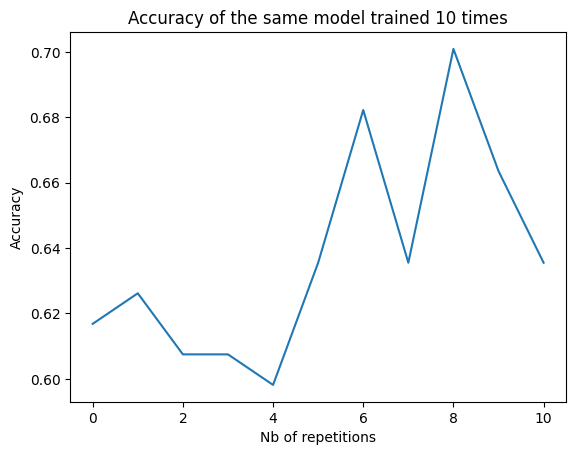

In [125]:
plt.xlabel('Nb of repetitions')
plt.ylabel('Accuracy')
plt.title('Accuracy of the same model trained 10 times')
plt.plot(nb,acc_test)

In [110]:
lr_list = [0.1, 0.01, 0.001, 0.0001]
for lr in lr_list:
    acc = train_lstm_model_loo_full_resample(X_total, y_total, 6, 23, lr)

no                 293
vulnerable user    293
vehicle            293
tree               293
two other cars     293
Name: count, dtype: int64
y_train counts: {'no': 293, 'tree': 293, 'two other cars': 293, 'vehicle': 293, 'vulnerable user': 293}
y_test counts: {'no': 75, 'tree': 1, 'two other cars': 3, 'vehicle': 21, 'vulnerable user': 7}
Epoch 1/23


C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.2930 - loss: 1.5703
Epoch 2/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4699 - loss: 1.1559
Epoch 3/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6287 - loss: 0.8468
Epoch 4/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7214 - loss: 0.6814
Epoch 5/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7527 - loss: 0.5780
Epoch 6/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7593 - loss: 0.5902
Epoch 7/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7572 - loss: 0.5294
Epoch 8/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7918 - loss: 0.4947
Epoch 9/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8088 - loss: 0.4516
Epoch 10/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8019 - loss: 0.4550
Epoch 11/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8001 - loss: 0.4759
Epoch 12/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8294 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.3030 - loss: 1.5652
Epoch 2/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.5401 - loss: 1.1348
Epoch 3/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.6479 - loss: 0.8279
Epoch 4/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6865 - loss: 0.6768
Epoch 5/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7574 - loss: 0.5814
Epoch 6/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7808 - loss: 0.5379
Epoch 7/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7672 - loss: 0.5145
Epoch 8/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7886 - loss: 0.4742
Epoch 9/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8151 - loss: 0.4449
Epoch 10/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8244 - loss: 0.4379
Epoch 11/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8178 - loss: 0.4087
Epoch 12/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8422 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.3135 - loss: 1.5573
Epoch 2/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.6236 - loss: 1.0833
Epoch 3/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7166 - loss: 0.7468
Epoch 4/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7598 - loss: 0.6004
Epoch 5/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7576 - loss: 0.5843
Epoch 6/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7483 - loss: 0.5608
Epoch 7/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7837 - loss: 0.5193
Epoch 8/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8038 - loss: 0.4617
Epoch 9/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8000 - loss: 0.4925
Epoch 10/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8085 - loss: 0.4387
Epoch 11/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8110 - loss: 0.4437
Epoch 12/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8195 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.2900 - loss: 1.5662
Epoch 2/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.5460 - loss: 1.1855
Epoch 3/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.5937 - loss: 0.9123
Epoch 4/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7077 - loss: 0.7397
Epoch 5/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7401 - loss: 0.6709
Epoch 6/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7665 - loss: 0.5577
Epoch 7/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7567 - loss: 0.5641
Epoch 8/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7883 - loss: 0.5070
Epoch 9/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7769 - loss: 0.5321
Epoch 10/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8064 - loss: 0.4773
Epoch 11/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7923 - loss: 0.4727
Epoch 12/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8082 - l

In [ ]:
#Let's try wit lr =0.1
acc_test01 = []
nb01=[]
for i in range(11):
    acc = train_lstm_model_loo_full_resample(X_total, y_total, 6, 30, 0.1)
    acc_test01.append(acc)
    nb01.append(i)

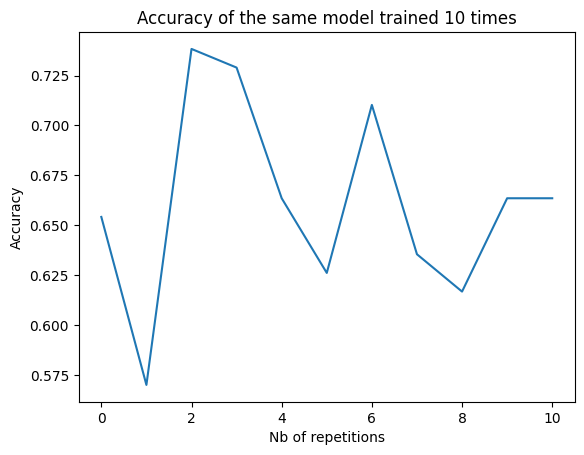

In [127]:
plt.xlabel('Nb of repetitions')
plt.ylabel('Accuracy')
plt.title('Accuracy of the same model trained 10 times')
plt.plot(nb01,acc_test01)

In [118]:
# Mean with different subjects:
mean_acc= []
std_acc =[]
epochs = []
for epoch in range(10,30,3):
    epochs.append(epoch)
    acc_list = []
    for i in subject_numbers:
        acc =train_lstm_model_loo_full_resample(X_total, y_total, i, epoch, 0.01)
        acc_list.append(acc)
    mean_acc.append(np.mean(acc_list))
    std_acc.append(np.std(acc_list))



no                 297
vulnerable user    297
vehicle            297
tree               297
two other cars     297
Name: count, dtype: int64
y_train counts: {'no': 297, 'tree': 297, 'two other cars': 297, 'vehicle': 297, 'vulnerable user': 297}
y_test counts: {'no': 71, 'tree': 1, 'two other cars': 1, 'vehicle': 22, 'vulnerable user': 7}
Epoch 1/10


C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.3785 - loss: 1.5586
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.6265 - loss: 1.0234
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7170 - loss: 0.7194
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7699 - loss: 0.5572
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7475 - loss: 0.6419
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7761 - loss: 0.5107
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8126 - loss: 0.4783
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8410 - loss: 0.4050
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8187 - loss: 0.4212
Epoch 10/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8362 - loss: 0.4195
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step
Test Accuracy: 0.5588235294117647
[[47  0  6 16  2]
 [ 0  0  0  1  0]
 [ 1  0  0  0  0]
 [ 2  1  0  9 10]
 [ 0  0  0  6  1

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.3679 - loss: 1.5719
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.5624 - loss: 1.0824
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.6921 - loss: 0.7699
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7214 - loss: 0.6632
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7441 - loss: 0.6256
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7725 - loss: 0.5612
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7943 - loss: 0.5100
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8011 - loss: 0.4851
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7934 - loss: 0.4848
Epoch 10/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7918 - loss: 0.4947
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step
Test Accuracy: 0.6407766990291263
[[53  1  1 14  3]
 [ 0  0  0  0  1]
 [ 0  0  0  0  0]
 [ 1  2  0  9 11]
 [ 0  0  0  3  4

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.3328 - loss: 1.5702
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.5419 - loss: 1.1453
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7047 - loss: 0.8387
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7410 - loss: 0.6607
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7595 - loss: 0.5732
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7845 - loss: 0.5360
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8053 - loss: 0.4965
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7804 - loss: 0.5020
Epoch 9/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7882 - loss: 0.4934
Epoch 10/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8217 - loss: 0.4687
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step
Test Accuracy: 0.6822429906542056
[[57  3  0 10  5]
 [ 0  1  0  0  0]
 [ 3  0  0  0  0]
 [ 2  1  0 10  8]
 [ 0  0  0  2  5

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.3197 - loss: 1.5700
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.5104 - loss: 1.1289
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6541 - loss: 0.8392
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7314 - loss: 0.6575
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7580 - loss: 0.5967
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7674 - loss: 0.5646
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7743 - loss: 0.5130
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7979 - loss: 0.4979
Epoch 9/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8037 - loss: 0.4799
Epoch 10/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8185 - loss: 0.4309
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step
Test Accuracy: 0.5765765765765766
[[49  3  5 12  8]
 [ 0  0  0  0  1]
 [ 0  0  2  0  0]
 [ 4  2  0  8 10]
 [ 1  0  0  1  5

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.3755 - loss: 1.5503
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.5935 - loss: 1.0893
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7244 - loss: 0.7755
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8083 - loss: 0.5684
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8448 - loss: 0.4546
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8349 - loss: 0.4656
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8436 - loss: 0.4363
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8626 - loss: 0.3971
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8616 - loss: 0.4332
Epoch 10/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8726 - loss: 0.3468
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step
Test Accuracy: 0.5185185185185185
[[44  6  0 20  3]
 [ 0  1  0  0  0]
 [ 2  0  0  1  0]
 [ 4  1  0 11  8]
 [ 0  1  0  6  

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.3515 - loss: 1.5524
Epoch 2/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.5846 - loss: 1.0675
Epoch 3/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7287 - loss: 0.7670
Epoch 4/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7363 - loss: 0.6588
Epoch 5/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7604 - loss: 0.5433
Epoch 6/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7723 - loss: 0.5077
Epoch 7/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7887 - loss: 0.4793
Epoch 8/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8039 - loss: 0.4720
Epoch 9/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8210 - loss: 0.4444
Epoch 10/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8373 - loss: 0.4201
Epoch 11/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8577 - loss: 0.3761
Epoch 12/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8462 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.3497 - loss: 1.5624
Epoch 2/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.5832 - loss: 1.0798
Epoch 3/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7026 - loss: 0.7303
Epoch 4/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7224 - loss: 0.6425
Epoch 5/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7707 - loss: 0.5551
Epoch 6/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7812 - loss: 0.5167
Epoch 7/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8091 - loss: 0.4826
Epoch 8/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8069 - loss: 0.4729
Epoch 9/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.7871 - loss: 0.5524
Epoch 10/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8076 - loss: 0.4834
Epoch 11/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8179 - loss: 0.4591
Epoch 12/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8080 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.3666 - loss: 1.5338
Epoch 2/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.4988 - loss: 1.1524
Epoch 3/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6164 - loss: 0.8624
Epoch 4/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7348 - loss: 0.6964
Epoch 5/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.7633 - loss: 0.6284
Epoch 6/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7659 - loss: 0.5758
Epoch 7/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7589 - loss: 0.5559
Epoch 8/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.7839 - loss: 0.5091
Epoch 9/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.7963 - loss: 0.4872
Epoch 10/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8144 - loss: 0.4404
Epoch 11/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8128 - loss: 0.4518
Epoch 12/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8318 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.3205 - loss: 1.5738
Epoch 2/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.5153 - loss: 1.1048
Epoch 3/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6941 - loss: 0.7051
Epoch 4/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7568 - loss: 0.5987
Epoch 5/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7446 - loss: 0.5733
Epoch 6/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7776 - loss: 0.5230
Epoch 7/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7705 - loss: 0.5048
Epoch 8/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7868 - loss: 0.4888
Epoch 9/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7948 - loss: 0.4968
Epoch 10/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8029 - loss: 0.4667
Epoch 11/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8386 - loss: 0.4158
Epoch 12/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8167 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.3398 - loss: 1.5701
Epoch 2/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.5944 - loss: 1.0823
Epoch 3/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7334 - loss: 0.6816
Epoch 4/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8039 - loss: 0.5393
Epoch 5/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7984 - loss: 0.4871
Epoch 6/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8416 - loss: 0.4426
Epoch 7/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8462 - loss: 0.4177
Epoch 8/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8673 - loss: 0.3788
Epoch 9/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8681 - loss: 0.3830
Epoch 10/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8671 - loss: 0.3406
Epoch 11/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8705 - loss: 0.3438
Epoch 12/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8744 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.3370 - loss: 1.5602
Epoch 2/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.5967 - loss: 1.0341
Epoch 3/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7652 - loss: 0.6606
Epoch 4/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7718 - loss: 0.5612
Epoch 5/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7911 - loss: 0.5014
Epoch 6/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8297 - loss: 0.4388
Epoch 7/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8227 - loss: 0.4313
Epoch 8/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8499 - loss: 0.3839
Epoch 9/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8573 - loss: 0.3815
Epoch 10/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8472 - loss: 0.3821
Epoch 11/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8703 - loss: 0.3547
Epoch 12/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8401 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.4044 - loss: 1.5630
Epoch 2/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.5323 - loss: 1.0701
Epoch 3/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6534 - loss: 0.8123
Epoch 4/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6399 - loss: 0.7544
Epoch 5/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7113 - loss: 0.6593
Epoch 6/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7541 - loss: 0.5713
Epoch 7/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.7896 - loss: 0.5007
Epoch 8/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.7451 - loss: 0.5794
Epoch 9/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7935 - loss: 0.4961
Epoch 10/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8036 - loss: 0.4903
Epoch 11/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8081 - loss: 0.4605
Epoch 12/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8029 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.2875 - loss: 1.5722
Epoch 2/16
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.5695 - loss: 1.0657
Epoch 3/16
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7191 - loss: 0.7105
Epoch 4/16
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7223 - loss: 0.6264
Epoch 5/16
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7586 - loss: 0.5561
Epoch 6/16
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7731 - loss: 0.5338
Epoch 7/16
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7814 - loss: 0.5021
Epoch 8/16
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7891 - loss: 0.4705
Epoch 9/16
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8086 - loss: 0.4519
Epoch 10/16
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8219 - loss: 0.4324
Epoch 11/16
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8291 - loss: 0.4254
Epoch 12/16
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8340 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.3048 - loss: 1.5750
Epoch 2/16
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.5290 - loss: 1.1037
Epoch 3/16
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6812 - loss: 0.7013
Epoch 4/16
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7471 - loss: 0.6007
Epoch 5/16
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7297 - loss: 0.5782
Epoch 6/16
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7816 - loss: 0.5279
Epoch 7/16
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7789 - loss: 0.5383
Epoch 8/16
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7986 - loss: 0.4594
Epoch 9/16
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8119 - loss: 0.4427
Epoch 10/16
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7924 - loss: 0.4689
Epoch 11/16
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8299 - loss: 0.4105
Epoch 12/16
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8245 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.3420 - loss: 1.5257
Epoch 2/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.5922 - loss: 1.0407
Epoch 3/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7645 - loss: 0.6543
Epoch 4/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8013 - loss: 0.5846
Epoch 5/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8298 - loss: 0.4835
Epoch 6/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8434 - loss: 0.4614
Epoch 7/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8238 - loss: 0.4696
Epoch 8/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8758 - loss: 0.3663
Epoch 9/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8729 - loss: 0.3895
Epoch 10/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8858 - loss: 0.3430
Epoch 11/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8793 - loss: 0.3743
Epoch 12/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8548 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.3358 - loss: 1.5695
Epoch 2/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.5453 - loss: 1.1359
Epoch 3/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7111 - loss: 0.7756
Epoch 4/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7904 - loss: 0.5716
Epoch 5/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7889 - loss: 0.5026
Epoch 6/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8098 - loss: 0.4698
Epoch 7/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8046 - loss: 0.4716
Epoch 8/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8174 - loss: 0.4403
Epoch 9/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8570 - loss: 0.3918
Epoch 10/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8437 - loss: 0.3948
Epoch 11/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8498 - loss: 0.3777
Epoch 12/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8562 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.3286 - loss: 1.5707
Epoch 2/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.5341 - loss: 1.1587
Epoch 3/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6724 - loss: 0.8578
Epoch 4/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7204 - loss: 0.6930
Epoch 5/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7343 - loss: 0.6308
Epoch 6/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7805 - loss: 0.5528
Epoch 7/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7807 - loss: 0.5412
Epoch 8/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8038 - loss: 0.5090
Epoch 9/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8095 - loss: 0.4902
Epoch 10/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8036 - loss: 0.4699
Epoch 11/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8035 - loss: 0.4649
Epoch 12/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8398 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.3458 - loss: 1.5409
Epoch 2/19
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.5787 - loss: 1.1289
Epoch 3/19
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.6786 - loss: 0.8049
Epoch 4/19
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7623 - loss: 0.6232
Epoch 5/19
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7491 - loss: 0.5521
Epoch 6/19
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7706 - loss: 0.5051
Epoch 7/19
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7771 - loss: 0.5378
Epoch 8/19
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7916 - loss: 0.4884
Epoch 9/19
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7818 - loss: 0.4727
Epoch 10/19
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7989 - loss: 0.4770
Epoch 11/19
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8172 - loss: 0.4208
Epoch 12/19
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8102 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.3346 - loss: 1.5455
Epoch 2/19
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.5028 - loss: 1.1145
Epoch 3/19
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6641 - loss: 0.8218
Epoch 4/19
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7385 - loss: 0.6407
Epoch 5/19
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7571 - loss: 0.5657
Epoch 6/19
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8018 - loss: 0.4977
Epoch 7/19
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7996 - loss: 0.4967
Epoch 8/19
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8121 - loss: 0.4836
Epoch 9/19
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8221 - loss: 0.4379
Epoch 10/19
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8086 - loss: 0.4636
Epoch 11/19
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8406 - loss: 0.4186
Epoch 12/19
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8273 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.3337 - loss: 1.5562
Epoch 2/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6364 - loss: 1.0107
Epoch 3/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7529 - loss: 0.6937
Epoch 4/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7896 - loss: 0.5792
Epoch 5/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8042 - loss: 0.5060
Epoch 6/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8057 - loss: 0.5375
Epoch 7/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8331 - loss: 0.4634
Epoch 8/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8557 - loss: 0.4057
Epoch 9/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8506 - loss: 0.4049
Epoch 10/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8620 - loss: 0.3795
Epoch 11/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8628 - loss: 0.3653
Epoch 12/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8831 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.3281 - loss: 1.5610
Epoch 2/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.5518 - loss: 1.1156
Epoch 3/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7166 - loss: 0.7384
Epoch 4/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7544 - loss: 0.5928
Epoch 5/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8106 - loss: 0.4801
Epoch 6/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8102 - loss: 0.4553
Epoch 7/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8356 - loss: 0.4301
Epoch 8/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8339 - loss: 0.4165
Epoch 9/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8507 - loss: 0.3952
Epoch 10/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8461 - loss: 0.3838
Epoch 11/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8643 - loss: 0.3755
Epoch 12/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8753 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.3293 - loss: 1.5664
Epoch 2/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6016 - loss: 1.1216
Epoch 3/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.6667 - loss: 0.7907
Epoch 4/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6921 - loss: 0.7361
Epoch 5/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7404 - loss: 0.6103
Epoch 6/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7631 - loss: 0.5506
Epoch 7/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7874 - loss: 0.5201
Epoch 8/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7958 - loss: 0.5078
Epoch 9/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7896 - loss: 0.4945
Epoch 10/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7914 - loss: 0.4892
Epoch 11/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8103 - loss: 0.4488
Epoch 12/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8191 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.3386 - loss: 1.5752
Epoch 2/22
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.5328 - loss: 1.1058
Epoch 3/22
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6716 - loss: 0.8132
Epoch 4/22
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7319 - loss: 0.6094
Epoch 5/22
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7613 - loss: 0.5744
Epoch 6/22
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7426 - loss: 0.5833
Epoch 7/22
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7709 - loss: 0.5363
Epoch 8/22
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8032 - loss: 0.4733
Epoch 9/22
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8023 - loss: 0.4657
Epoch 10/22
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8336 - loss: 0.4062
Epoch 11/22
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8287 - loss: 0.4046
Epoch 12/22
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8239 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.3342 - loss: 1.5640
Epoch 2/22
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.5432 - loss: 1.1036
Epoch 3/22
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6959 - loss: 0.7825
Epoch 4/22
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7353 - loss: 0.6474
Epoch 5/22
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7353 - loss: 0.5899
Epoch 6/22
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7739 - loss: 0.5508
Epoch 7/22
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7592 - loss: 0.5347
Epoch 8/22
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7976 - loss: 0.4701
Epoch 9/22
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7955 - loss: 0.4477
Epoch 10/22
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8066 - loss: 0.4148
Epoch 11/22
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8067 - loss: 0.4328
Epoch 12/22
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8492 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.3641 - loss: 1.5460
Epoch 2/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.6010 - loss: 1.0606
Epoch 3/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7239 - loss: 0.7579
Epoch 4/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7500 - loss: 0.6239
Epoch 5/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8053 - loss: 0.5187
Epoch 6/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8337 - loss: 0.4696
Epoch 7/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8230 - loss: 0.4550
Epoch 8/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8537 - loss: 0.4291
Epoch 9/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8607 - loss: 0.4061
Epoch 10/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8674 - loss: 0.3844
Epoch 11/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8844 - loss: 0.3453
Epoch 12/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8743 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.3614 - loss: 1.5457
Epoch 2/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.5804 - loss: 1.0858
Epoch 3/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7103 - loss: 0.7120
Epoch 4/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7829 - loss: 0.5360
Epoch 5/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7991 - loss: 0.4700
Epoch 6/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7938 - loss: 0.4637
Epoch 7/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8131 - loss: 0.4478
Epoch 8/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8191 - loss: 0.4652
Epoch 9/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8432 - loss: 0.4049
Epoch 10/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8429 - loss: 0.3881
Epoch 11/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8562 - loss: 0.3717
Epoch 12/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8614 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.3742 - loss: 1.5538
Epoch 2/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.5580 - loss: 1.1012
Epoch 3/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7187 - loss: 0.7978
Epoch 4/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7304 - loss: 0.6643
Epoch 5/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7293 - loss: 0.6438
Epoch 6/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7819 - loss: 0.5676
Epoch 7/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7771 - loss: 0.5540
Epoch 8/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7842 - loss: 0.5148
Epoch 9/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7788 - loss: 0.5391
Epoch 10/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7971 - loss: 0.4893
Epoch 11/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8057 - loss: 0.5123
Epoch 12/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8250 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.3054 - loss: 1.5654
Epoch 2/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.5234 - loss: 1.1538
Epoch 3/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7097 - loss: 0.8426
Epoch 4/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7468 - loss: 0.6084
Epoch 5/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7705 - loss: 0.5406
Epoch 6/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7647 - loss: 0.5430
Epoch 7/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7544 - loss: 0.5605
Epoch 8/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8077 - loss: 0.4884
Epoch 9/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8027 - loss: 0.4511
Epoch 10/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8101 - loss: 0.4521
Epoch 11/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8245 - loss: 0.4537
Epoch 12/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8149 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.3161 - loss: 1.5497
Epoch 2/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.5378 - loss: 1.0643
Epoch 3/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6521 - loss: 0.8403
Epoch 4/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7260 - loss: 0.6456
Epoch 5/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7268 - loss: 0.6191
Epoch 6/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7685 - loss: 0.5445
Epoch 7/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7791 - loss: 0.5021
Epoch 8/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7804 - loss: 0.4926
Epoch 9/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7920 - loss: 0.4793
Epoch 10/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8210 - loss: 0.4483
Epoch 11/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7795 - loss: 0.4933
Epoch 12/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8077 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.3370 - loss: 1.5488
Epoch 2/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.6290 - loss: 0.9860
Epoch 3/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7455 - loss: 0.6985
Epoch 4/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7880 - loss: 0.5517
Epoch 5/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7711 - loss: 0.6297
Epoch 6/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8396 - loss: 0.4734
Epoch 7/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8289 - loss: 0.4626
Epoch 8/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8736 - loss: 0.3786
Epoch 9/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8618 - loss: 0.3763
Epoch 10/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8611 - loss: 0.3809
Epoch 11/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8954 - loss: 0.3062
Epoch 12/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8762 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.3082 - loss: 1.5608
Epoch 2/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.5733 - loss: 1.1067
Epoch 3/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7240 - loss: 0.7522
Epoch 4/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7792 - loss: 0.5724
Epoch 5/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7893 - loss: 0.5029
Epoch 6/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7757 - loss: 0.5672
Epoch 7/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7955 - loss: 0.4505
Epoch 8/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7895 - loss: 0.4843
Epoch 9/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8230 - loss: 0.4440
Epoch 10/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8460 - loss: 0.4139
Epoch 11/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8404 - loss: 0.3840
Epoch 12/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8683 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.3321 - loss: 1.5576
Epoch 2/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.5599 - loss: 1.0795
Epoch 3/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6488 - loss: 0.8250
Epoch 4/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7260 - loss: 0.6570
Epoch 5/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7547 - loss: 0.5762
Epoch 6/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7753 - loss: 0.5855
Epoch 7/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7726 - loss: 0.5415
Epoch 8/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7933 - loss: 0.4781
Epoch 9/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7975 - loss: 0.4830
Epoch 10/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7933 - loss: 0.4714
Epoch 11/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8186 - loss: 0.4300
Epoch 12/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8051 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.3120 - loss: 1.5542
Epoch 2/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.5341 - loss: 1.1173
Epoch 3/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6765 - loss: 0.7543
Epoch 4/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7266 - loss: 0.6414
Epoch 5/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7560 - loss: 0.5676
Epoch 6/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7523 - loss: 0.5413
Epoch 7/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7718 - loss: 0.5089
Epoch 8/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7525 - loss: 0.5342
Epoch 9/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8115 - loss: 0.4511
Epoch 10/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7947 - loss: 0.4565
Epoch 11/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7879 - loss: 0.5070
Epoch 12/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7925 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.3136 - loss: 1.5564
Epoch 2/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5005 - loss: 1.1259
Epoch 3/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6246 - loss: 0.8774
Epoch 4/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.6644 - loss: 0.7367
Epoch 5/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.7266 - loss: 0.6075
Epoch 6/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.7471 - loss: 0.6006
Epoch 7/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.7593 - loss: 0.5393
Epoch 8/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7784 - loss: 0.5126
Epoch 9/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7850 - loss: 0.4747
Epoch 10/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.7943 - loss: 0.4742
Epoch 11/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8128 - loss: 0.4322
Epoch 12/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.8034 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\239959237.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.3173 - loss: 1.5549
Epoch 2/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.5790 - loss: 1.0395
Epoch 3/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7083 - loss: 0.7663
Epoch 4/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7231 - loss: 0.6497
Epoch 5/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7848 - loss: 0.5534
Epoch 6/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7936 - loss: 0.5340
Epoch 7/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8091 - loss: 0.5291
Epoch 8/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8172 - loss: 0.4841
Epoch 9/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8604 - loss: 0.4061
Epoch 10/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8508 - loss: 0.4114
Epoch 11/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8412 - loss: 0.4379
Epoch 12/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8694 - l

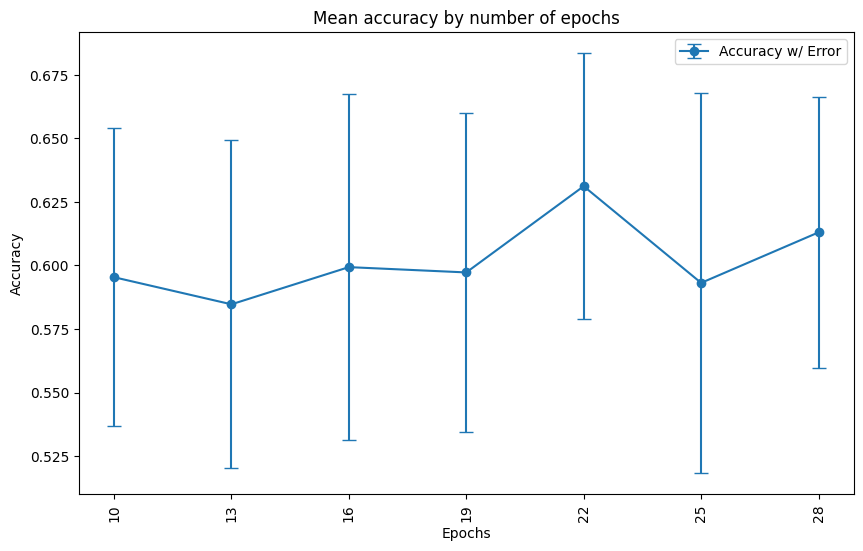

In [155]:
plt.figure(figsize=(10, 6))

# Use errorbar instead of plot for accuracies with error bars
plt.errorbar(epochs, mean_acc, yerr=std_acc, label='Accuracy w/ Error', marker='o', capsize=5)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs, rotation=90) # Assuming features_used is a list of feature counts
plt.title('Mean accuracy by number of epochs')

# Option to add a legend if you want to label the error bars plot
plt.legend()

plt.show()

New model without skip connection

In [130]:
from tensorflow.keras.optimizers import Adam

# Same function with resampling:
def train_lstm_model_loo_full_resample(X_total, y_total, num_sub, num_epochs, lr):
    '''
    X_total : dataframe which contains the time series 
    y_total : array which contains the classes associated with the time series
    num_sub : number of the subject used as test set
    num_epochs : number of epochs for training
    indices : indices of the lines of X_total corresponding to each subject
    '''
    
    # Récupération des indices des observations pour chaque sujet
    sub_indices = {sub: i for i, sub in enumerate([3, 5, 6, 7, 8])}
    test_sub = sub_indices[num_sub]

    # Définir l'index pour le test et l'entraînement en utilisant les indices préparés
    X_train_temp, X_test_temp = X_total[X_total['indices'] != test_sub], X_total[X_total['indices'] == test_sub]
    y_train_temp, y_test_temp = y_total[X_total['indices'] != test_sub], y_total[X_total['indices'] == test_sub]

    #Drop column 'indices'
    X_train_temp = X_train_temp.drop('indices', axis=1)
    X_test_temp = X_test_temp.drop('indices', axis=1)

    #Increase the size of the training dataset 
    ros = RandomOverSampler(random_state=42)
    X_train_temp, y_train_temp = ros.fit_resample(X_train_temp, y_train_temp)
    print(pd.Series(y_train_temp).value_counts())

    
    n_timesteps = len(X_train_temp.iloc[0, 0])
    n_features = X_train_temp.shape[1]

    # Reshape of X_train
    X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
    X_train = X_train.reshape(-1, n_timesteps, n_features)


    # Reshape of X_test
    X_test = np.array(X_test_temp.applymap(np.array).values.tolist())
    X_test = X_test.reshape(-1, n_timesteps, n_features)
    
    # Encodage des labels de sortie
    le = LabelEncoder()
    le.fit(y_total)
    y_train_encoded = le.transform(y_train_temp)
    y_test_encoded = le.transform(y_test_temp)
    y_train = to_categorical(y_train_encoded)  # Conversion en format catégoriel pour le softmax
    y_test = to_categorical(y_test_encoded)

    # # Création du modèle LSTM
    input_tensor = Input(shape=(n_timesteps, n_features))
    x = LSTM(50, return_sequences=True)(input_tensor) # LSTM avec return_sequences=True pour connecter à un autre LSTM
    x = Dropout(0.2)(x)
    x = LSTM(50)(x) # second LSTM, cette fois sans return_sequences
    x = Dropout(0.2)(x)
    output_tensor = Dense(len(np.unique(y_train_encoded)), activation='softmax')(x)

    #Model with skip connections:
    # input_tensor = Input(shape=(n_timesteps, n_features))
    # x = Masking(mask_value=0.0)(input_tensor) #Masking layer to ignore the 0. introduced with padding
    # x = LSTM(50, return_sequences=True)(x)
    # x = Dropout(0.2)(x)
    # x2 = LSTM(50)(x)
    # x2 = Dropout(0.2)(x2)
    # x1 = Dense(50, activation='relu')(x[:, -1, :])  # Utilisation de la dernière sortie du premier LSTM, Connexion directe depuis la sortie du premier LSTM 
    # concat = concatenate([x1, x2])

    # Couche Dense finale pour la classification
    #output_tensor = Dense(len(np.unique(y_train_encoded)), activation='softmax')(concat)

    # Création du modèle
    model = Model(inputs=input_tensor, outputs=output_tensor)
    
    learning_rate = lr
    optimizer = Adam(learning_rate=learning_rate)

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Configuration de l'arrêt précoce
    early_stopping_monitor = EarlyStopping(
        monitor='val_loss',
        min_delta=0.001,
        patience=10,
        verbose=1,
        mode='auto',
        restore_best_weights=True
    )


    # Entraînement du modèle avec validation sur une fraction des données d'entraînement
    #X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

    # Fonction pour convertir les labels catégoriels en labels originaux et compter les occurrences
    def count_labels(y):
        labels = np.argmax(y, axis=1)  # Convertir de one-hot à labels originaux
        label_counts = np.unique(labels, return_counts=True)
        class_counts = {le.classes_[i]: count for i, count in zip(label_counts[0], label_counts[1])}
        return class_counts

    # Compter et afficher les occurrences pour chaque ensemble
    y_train_counts = count_labels(y_train)
    y_test_counts = count_labels(y_test)
    #y_val_counts = count_labels(y_val)

    print("y_train counts:", y_train_counts)
    print("y_test counts:", y_test_counts)
    #print("y_val counts:", y_val_counts)
    
    #model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, callbacks=[early_stopping_monitor])gg
    model.fit(X_train, y_train, epochs=num_epochs, batch_size=32)

         # Prédiction sur l'ensemble de test et calcul de l'accuracy
    y_pred_prob = model.predict(X_test)
    y_pred_labels = np.argmax(y_pred_prob, axis=1)
    y_test_labels = np.argmax(y_test, axis=1)
    accuracy = accuracy_score(y_test_labels, y_pred_labels)

    print("Test Accuracy:", accuracy)


    # Print for each class if it managed to predict or not
    # Calculer la matrice de confusion
    cm = confusion_matrix(y_test_labels, y_pred_labels)

    print(cm)

    # Obtenir les étiquettes de classe à partir de l'encodeur
    class_labels = le.classes_  # le est votre LabelEncoder

    # Initialisation du dictionnaire pour stocker les résultats
    correct_counts = {label: 0 for label in class_labels}
    total_counts = {label: 0 for label in class_labels}

    # Compter les totaux et les corrects pour chaque classe
    for true_label, pred_label in zip(y_test_labels, y_pred_labels):
        true_class = class_labels[true_label]
        total_counts[true_class] += 1
        if true_label == pred_label:
            correct_counts[true_class] += 1

    # Calculer les fractions de corrects/totaux pour chaque classe
    accuracy_dict = {label: f"{correct_counts[label]}/{total_counts[label]}" for label in class_labels}

    print("Accuracy for each class:", accuracy_dict)
    
    return accuracy

no                 293
vulnerable user    293
vehicle            293
tree               293
two other cars     293
Name: count, dtype: int64
y_train counts: {'no': 293, 'tree': 293, 'two other cars': 293, 'vehicle': 293, 'vulnerable user': 293}
y_test counts: {'no': 75, 'tree': 1, 'two other cars': 3, 'vehicle': 21, 'vulnerable user': 7}
Epoch 1/13


C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\280729031.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\280729031.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.3049 - loss: 1.5723
Epoch 2/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.4431 - loss: 1.2719
Epoch 3/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6167 - loss: 0.9890
Epoch 4/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7230 - loss: 0.7512
Epoch 5/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7266 - loss: 0.6376
Epoch 6/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7648 - loss: 0.5780
Epoch 7/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7688 - loss: 0.5409
Epoch 8/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.7739 - loss: 0.5590
Epoch 9/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6775 - loss: 0.7581
Epoch 10/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7661 - loss: 0.5592
Epoch 11/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7738 - loss: 0.5178
Epoch 12/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8056 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\280729031.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\280729031.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.3434 - loss: 1.5436
Epoch 2/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.4769 - loss: 1.1696
Epoch 3/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.6119 - loss: 0.9631
Epoch 4/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.7041 - loss: 0.7746
Epoch 5/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.7425 - loss: 0.6180
Epoch 6/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7329 - loss: 0.6197
Epoch 7/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7752 - loss: 0.4888
Epoch 8/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.7603 - loss: 0.5656
Epoch 9/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7888 - loss: 0.5110
Epoch 10/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.7989 - loss: 0.4732
Epoch 11/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7937 - loss: 0.4851
Epoch 12/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.7933 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\280729031.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\280729031.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.2561 - loss: 1.5681
Epoch 2/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.4719 - loss: 1.1978
Epoch 3/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.6576 - loss: 0.8430
Epoch 4/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7144 - loss: 0.6392
Epoch 5/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.7660 - loss: 0.5716
Epoch 6/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7821 - loss: 0.5023
Epoch 7/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7789 - loss: 0.5353
Epoch 8/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8112 - loss: 0.4951
Epoch 9/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8166 - loss: 0.4682
Epoch 10/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8188 - loss: 0.4492
Epoch 11/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7886 - loss: 0.5064
Epoch 12/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8327 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\280729031.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\280729031.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.3306 - loss: 1.5690
Epoch 2/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.4385 - loss: 1.2382
Epoch 3/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.5886 - loss: 0.9706
Epoch 4/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.7205 - loss: 0.6743
Epoch 5/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7589 - loss: 0.5874
Epoch 6/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.7769 - loss: 0.5177
Epoch 7/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7904 - loss: 0.5403
Epoch 8/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7964 - loss: 0.5033
Epoch 9/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8196 - loss: 0.4640
Epoch 10/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7752 - loss: 0.5862
Epoch 11/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8090 - loss: 0.5125
Epoch 12/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8393 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\280729031.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\280729031.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.2618 - loss: 1.5593
Epoch 2/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.4681 - loss: 1.2046
Epoch 3/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.6322 - loss: 0.8847
Epoch 4/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.6899 - loss: 0.7551
Epoch 5/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.7595 - loss: 0.5792
Epoch 6/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7361 - loss: 0.6266
Epoch 7/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.7596 - loss: 0.5802
Epoch 8/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7671 - loss: 0.5688
Epoch 9/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7193 - loss: 0.7074
Epoch 10/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7699 - loss: 0.5407
Epoch 11/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7983 - loss: 0.4980
Epoch 12/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8062 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\280729031.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\280729031.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.3022 - loss: 1.5588
Epoch 2/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.5064 - loss: 1.1768
Epoch 3/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.6564 - loss: 0.9316
Epoch 4/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7067 - loss: 0.7238
Epoch 5/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7473 - loss: 0.5930
Epoch 6/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.7341 - loss: 0.6121
Epoch 7/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7494 - loss: 0.6143
Epoch 8/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.7579 - loss: 0.5392
Epoch 9/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7934 - loss: 0.5035
Epoch 10/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7870 - loss: 0.5371
Epoch 11/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7927 - loss: 0.4822
Epoch 12/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7798 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\280729031.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\280729031.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.2602 - loss: 1.5824
Epoch 2/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.4832 - loss: 1.2000
Epoch 3/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.6808 - loss: 0.8063
Epoch 4/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7285 - loss: 0.6793
Epoch 5/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7536 - loss: 0.5909
Epoch 6/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7621 - loss: 0.5429
Epoch 7/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7617 - loss: 0.5873
Epoch 8/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8154 - loss: 0.4797
Epoch 9/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7691 - loss: 0.5678
Epoch 10/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8009 - loss: 0.5175
Epoch 11/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8263 - loss: 0.4674
Epoch 12/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8352 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\280729031.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\280729031.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.3037 - loss: 1.5783
Epoch 2/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.4973 - loss: 1.1846
Epoch 3/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7104 - loss: 0.7505
Epoch 4/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7483 - loss: 0.6026
Epoch 5/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7310 - loss: 0.6374
Epoch 6/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.7719 - loss: 0.5437
Epoch 7/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7609 - loss: 0.5264
Epoch 8/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7680 - loss: 0.5281
Epoch 9/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7361 - loss: 0.6798
Epoch 10/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7497 - loss: 0.5841
Epoch 11/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7797 - loss: 0.5620
Epoch 12/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7668 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\280729031.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\280729031.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.3099 - loss: 1.5587
Epoch 2/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.4928 - loss: 1.1522
Epoch 3/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.6763 - loss: 0.8593
Epoch 4/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.7098 - loss: 0.6977
Epoch 5/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.7400 - loss: 0.5940
Epoch 6/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.7694 - loss: 0.5654
Epoch 7/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.7580 - loss: 0.5407
Epoch 8/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.7933 - loss: 0.5072
Epoch 9/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.7832 - loss: 0.5237
Epoch 10/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.7594 - loss: 0.5630
Epoch 11/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.7931 - loss: 0.5303
Epoch 12/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.8060 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\280729031.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\280729031.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.2138 - loss: 1.5708
Epoch 2/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.4990 - loss: 1.1561
Epoch 3/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.5759 - loss: 0.9815
Epoch 4/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.6889 - loss: 0.7831
Epoch 5/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.7128 - loss: 0.6697
Epoch 6/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.7196 - loss: 0.6380
Epoch 7/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.7551 - loss: 0.5462
Epoch 8/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.7168 - loss: 0.6679
Epoch 9/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.7466 - loss: 0.5885
Epoch 10/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.7720 - loss: 0.5155
Epoch 11/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.7712 - loss: 0.5077
Epoch 12/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.7684 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\280729031.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\280729031.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.2760 - loss: 1.5689
Epoch 2/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.4840 - loss: 1.1528
Epoch 3/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.6737 - loss: 0.8847
Epoch 4/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.7277 - loss: 0.6801
Epoch 5/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.7482 - loss: 0.6000
Epoch 6/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7544 - loss: 0.5944
Epoch 7/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.7566 - loss: 0.6041
Epoch 8/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.7359 - loss: 0.6208
Epoch 9/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7702 - loss: 0.5569
Epoch 10/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.7785 - loss: 0.5051
Epoch 11/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7934 - loss: 0.5012
Epoch 12/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.7968 - l

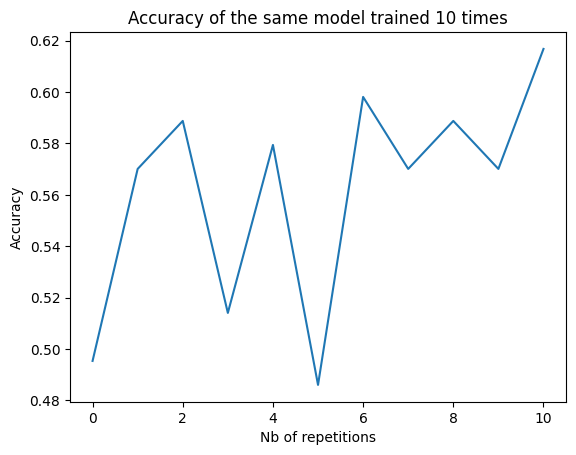

In [131]:
#Let's try wit lr =0.1
acc_test13_simple = []
nb13_simple=[]
for i in range(11):
    acc = train_lstm_model_loo_full_resample(X_total, y_total, 6, 13, 0.1)
    acc_test13_simple.append(acc)
    nb13_simple.append(i)

plt.xlabel('Nb of repetitions')
plt.ylabel('Accuracy')
plt.title('Accuracy of the same model trained 10 times')
plt.plot(nb13_simple,acc_test13_simple)

New model with skip connection but without dropout

In [133]:
from tensorflow.keras.optimizers import Adam

# Same function with resampling:
def train_lstm_model_loo_full_resample(X_total, y_total, num_sub, num_epochs, lr):
    '''
    X_total : dataframe which contains the time series 
    y_total : array which contains the classes associated with the time series
    num_sub : number of the subject used as test set
    num_epochs : number of epochs for training
    indices : indices of the lines of X_total corresponding to each subject
    '''
    
    # Récupération des indices des observations pour chaque sujet
    sub_indices = {sub: i for i, sub in enumerate([3, 5, 6, 7, 8])}
    test_sub = sub_indices[num_sub]

    # Définir l'index pour le test et l'entraînement en utilisant les indices préparés
    X_train_temp, X_test_temp = X_total[X_total['indices'] != test_sub], X_total[X_total['indices'] == test_sub]
    y_train_temp, y_test_temp = y_total[X_total['indices'] != test_sub], y_total[X_total['indices'] == test_sub]

    #Drop column 'indices'
    X_train_temp = X_train_temp.drop('indices', axis=1)
    X_test_temp = X_test_temp.drop('indices', axis=1)

    #Increase the size of the training dataset 
    ros = RandomOverSampler(random_state=42)
    X_train_temp, y_train_temp = ros.fit_resample(X_train_temp, y_train_temp)
    print(pd.Series(y_train_temp).value_counts())

    
    n_timesteps = len(X_train_temp.iloc[0, 0])
    n_features = X_train_temp.shape[1]

    # Reshape of X_train
    X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
    X_train = X_train.reshape(-1, n_timesteps, n_features)


    # Reshape of X_test
    X_test = np.array(X_test_temp.applymap(np.array).values.tolist())
    X_test = X_test.reshape(-1, n_timesteps, n_features)
    
    # Encodage des labels de sortie
    le = LabelEncoder()
    le.fit(y_total)
    y_train_encoded = le.transform(y_train_temp)
    y_test_encoded = le.transform(y_test_temp)
    y_train = to_categorical(y_train_encoded)  # Conversion en format catégoriel pour le softmax
    y_test = to_categorical(y_test_encoded)

    #Model with skip connections:
    input_tensor = Input(shape=(n_timesteps, n_features))
    x = Masking(mask_value=0.0)(input_tensor) #Masking layer to ignore the 0. introduced with padding
    x = LSTM(50, return_sequences=True)(x)
    #x = Dropout(0.2)(x)
    x2 = LSTM(50)(x)
    #x2 = Dropout(0.2)(x2)
    x1 = Dense(50, activation='relu')(x[:, -1, :])  # Utilisation de la dernière sortie du premier LSTM, Connexion directe depuis la sortie du premier LSTM 
    concat = concatenate([x1, x2])

    #Couche Dense finale pour la classification
    output_tensor = Dense(len(np.unique(y_train_encoded)), activation='softmax')(concat)

    # Création du modèle
    model = Model(inputs=input_tensor, outputs=output_tensor)
    
    learning_rate = lr
    optimizer = Adam(learning_rate=learning_rate)

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Configuration de l'arrêt précoce
    early_stopping_monitor = EarlyStopping(
        monitor='val_loss',
        min_delta=0.001,
        patience=10,
        verbose=1,
        mode='auto',
        restore_best_weights=True
    )


    # Entraînement du modèle avec validation sur une fraction des données d'entraînement
    #X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

    # Fonction pour convertir les labels catégoriels en labels originaux et compter les occurrences
    def count_labels(y):
        labels = np.argmax(y, axis=1)  # Convertir de one-hot à labels originaux
        label_counts = np.unique(labels, return_counts=True)
        class_counts = {le.classes_[i]: count for i, count in zip(label_counts[0], label_counts[1])}
        return class_counts

    # Compter et afficher les occurrences pour chaque ensemble
    y_train_counts = count_labels(y_train)
    y_test_counts = count_labels(y_test)
    #y_val_counts = count_labels(y_val)

    print("y_train counts:", y_train_counts)
    print("y_test counts:", y_test_counts)
    #print("y_val counts:", y_val_counts)
    
    #model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, callbacks=[early_stopping_monitor])gg
    model.fit(X_train, y_train, epochs=num_epochs, batch_size=32)

         # Prédiction sur l'ensemble de test et calcul de l'accuracy
    y_pred_prob = model.predict(X_test)
    y_pred_labels = np.argmax(y_pred_prob, axis=1)
    y_test_labels = np.argmax(y_test, axis=1)
    accuracy = accuracy_score(y_test_labels, y_pred_labels)

    print("Test Accuracy:", accuracy)


    # Print for each class if it managed to predict or not
    # Calculer la matrice de confusion
    cm = confusion_matrix(y_test_labels, y_pred_labels)

    print(cm)

    # Obtenir les étiquettes de classe à partir de l'encodeur
    class_labels = le.classes_  # le est votre LabelEncoder

    # Initialisation du dictionnaire pour stocker les résultats
    correct_counts = {label: 0 for label in class_labels}
    total_counts = {label: 0 for label in class_labels}

    # Compter les totaux et les corrects pour chaque classe
    for true_label, pred_label in zip(y_test_labels, y_pred_labels):
        true_class = class_labels[true_label]
        total_counts[true_class] += 1
        if true_label == pred_label:
            correct_counts[true_class] += 1

    # Calculer les fractions de corrects/totaux pour chaque classe
    accuracy_dict = {label: f"{correct_counts[label]}/{total_counts[label]}" for label in class_labels}

    print("Accuracy for each class:", accuracy_dict)
    
    return accuracy

no                 293
vulnerable user    293
vehicle            293
tree               293
two other cars     293
Name: count, dtype: int64
y_train counts: {'no': 293, 'tree': 293, 'two other cars': 293, 'vehicle': 293, 'vulnerable user': 293}
y_test counts: {'no': 75, 'tree': 1, 'two other cars': 3, 'vehicle': 21, 'vulnerable user': 7}
Epoch 1/13


C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\1004698911.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\1004698911.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.3178 - loss: 1.5685
Epoch 2/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.5731 - loss: 1.0735
Epoch 3/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6873 - loss: 0.7511
Epoch 4/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7398 - loss: 0.6661
Epoch 5/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7629 - loss: 0.5762
Epoch 6/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7656 - loss: 0.5523
Epoch 7/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7832 - loss: 0.4958
Epoch 8/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7919 - loss: 0.4990
Epoch 9/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8025 - loss: 0.4613
Epoch 10/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.8106 - loss: 0.4732
Epoch 11/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.8357 - loss: 0.4044
Epoch 12/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.8192 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\1004698911.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\1004698911.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.3470 - loss: 1.5272
Epoch 2/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.5504 - loss: 1.0436
Epoch 3/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.7332 - loss: 0.6938
Epoch 4/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.7398 - loss: 0.6394
Epoch 5/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.7850 - loss: 0.5425
Epoch 6/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.7659 - loss: 0.5519
Epoch 7/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.7966 - loss: 0.5001
Epoch 8/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8156 - loss: 0.4644
Epoch 9/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.8407 - loss: 0.4106
Epoch 10/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.8256 - loss: 0.4204
Epoch 11/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.8268 - loss: 0.4103
Epoch 12/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.8509 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\1004698911.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\1004698911.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.3761 - loss: 1.5591
Epoch 2/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.5445 - loss: 1.0802
Epoch 3/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.6779 - loss: 0.7567
Epoch 4/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.7827 - loss: 0.5810
Epoch 5/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.7870 - loss: 0.5429
Epoch 6/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.8154 - loss: 0.4654
Epoch 7/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.8311 - loss: 0.4308
Epoch 8/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.8464 - loss: 0.4119
Epoch 9/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.8615 - loss: 0.3998
Epoch 10/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.8566 - loss: 0.3798
Epoch 11/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.8693 - loss: 0.3580
Epoch 12/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.8705 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\1004698911.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\1004698911.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.2912 - loss: 1.5732
Epoch 2/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.5575 - loss: 1.1276
Epoch 3/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.6404 - loss: 0.8666
Epoch 4/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.7560 - loss: 0.6425
Epoch 5/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.7795 - loss: 0.5364
Epoch 6/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.7722 - loss: 0.5241
Epoch 7/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.8022 - loss: 0.4813
Epoch 8/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.8357 - loss: 0.4192
Epoch 9/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.8335 - loss: 0.4005
Epoch 10/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.8336 - loss: 0.3913
Epoch 11/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.8519 - loss: 0.3609
Epoch 12/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.8683 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\1004698911.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\1004698911.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.2980 - loss: 1.5707
Epoch 2/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.5476 - loss: 1.0992
Epoch 3/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.7003 - loss: 0.7736
Epoch 4/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.7486 - loss: 0.6080
Epoch 5/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.7891 - loss: 0.5248
Epoch 6/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.7782 - loss: 0.5591
Epoch 7/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.8113 - loss: 0.4974
Epoch 8/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.8424 - loss: 0.4177
Epoch 9/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8228 - loss: 0.4210
Epoch 10/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8602 - loss: 0.3805
Epoch 11/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.8488 - loss: 0.4068
Epoch 12/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8498 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\1004698911.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\1004698911.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.3296 - loss: 1.5498
Epoch 2/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.5873 - loss: 1.1106
Epoch 3/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.6872 - loss: 0.8110
Epoch 4/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.7438 - loss: 0.6262
Epoch 5/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.7474 - loss: 0.5793
Epoch 6/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.7411 - loss: 0.5733
Epoch 7/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.7934 - loss: 0.4764
Epoch 8/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.7781 - loss: 0.5138
Epoch 9/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.7823 - loss: 0.5040
Epoch 10/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8130 - loss: 0.4381
Epoch 11/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8213 - loss: 0.4252
Epoch 12/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.8160 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\1004698911.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\1004698911.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.3694 - loss: 1.5592
Epoch 2/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.5785 - loss: 1.0371
Epoch 3/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.7156 - loss: 0.7015
Epoch 4/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.7379 - loss: 0.5664
Epoch 5/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.7891 - loss: 0.5156
Epoch 6/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.7835 - loss: 0.5062
Epoch 7/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.7795 - loss: 0.5027
Epoch 8/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.8080 - loss: 0.4749
Epoch 9/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8266 - loss: 0.4456
Epoch 10/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8273 - loss: 0.4064
Epoch 11/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8428 - loss: 0.4151
Epoch 12/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8629 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\1004698911.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\1004698911.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.3368 - loss: 1.5572
Epoch 2/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.5828 - loss: 1.0534
Epoch 3/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.6945 - loss: 0.7522
Epoch 4/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.7510 - loss: 0.6398
Epoch 5/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.7719 - loss: 0.5409
Epoch 6/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.7781 - loss: 0.4975
Epoch 7/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.7799 - loss: 0.5090
Epoch 8/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.8040 - loss: 0.4484
Epoch 9/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.8144 - loss: 0.4493
Epoch 10/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.8302 - loss: 0.4271
Epoch 11/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.8357 - loss: 0.4139
Epoch 12/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.8529 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\1004698911.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\1004698911.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.3783 - loss: 1.5521
Epoch 2/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.5766 - loss: 1.0588
Epoch 3/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.7392 - loss: 0.7227
Epoch 4/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.7642 - loss: 0.5570
Epoch 5/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.7830 - loss: 0.5179
Epoch 6/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.7984 - loss: 0.4699
Epoch 7/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.8154 - loss: 0.4243
Epoch 8/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.8158 - loss: 0.4303
Epoch 9/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8290 - loss: 0.4068
Epoch 10/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8651 - loss: 0.3629
Epoch 11/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.8723 - loss: 0.3319
Epoch 12/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8665 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\1004698911.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\1004698911.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.3887 - loss: 1.5437
Epoch 2/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.4992 - loss: 1.1014
Epoch 3/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.6615 - loss: 0.8086
Epoch 4/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.7793 - loss: 0.6330
Epoch 5/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.7529 - loss: 0.5728
Epoch 6/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8095 - loss: 0.4838
Epoch 7/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.7880 - loss: 0.4993
Epoch 8/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8133 - loss: 0.4283
Epoch 9/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.8189 - loss: 0.4502
Epoch 10/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8408 - loss: 0.3782
Epoch 11/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8382 - loss: 0.4147
Epoch 12/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8425 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\1004698911.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\1004698911.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.3086 - loss: 1.5746
Epoch 2/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.5230 - loss: 1.1200
Epoch 3/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.7096 - loss: 0.7331
Epoch 4/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.7449 - loss: 0.6235
Epoch 5/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.7478 - loss: 0.5856
Epoch 6/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.7731 - loss: 0.5146
Epoch 7/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.7610 - loss: 0.5790
Epoch 8/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8120 - loss: 0.4629
Epoch 9/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8075 - loss: 0.4480
Epoch 10/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8453 - loss: 0.4161
Epoch 11/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8356 - loss: 0.4105
Epoch 12/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8642 - l

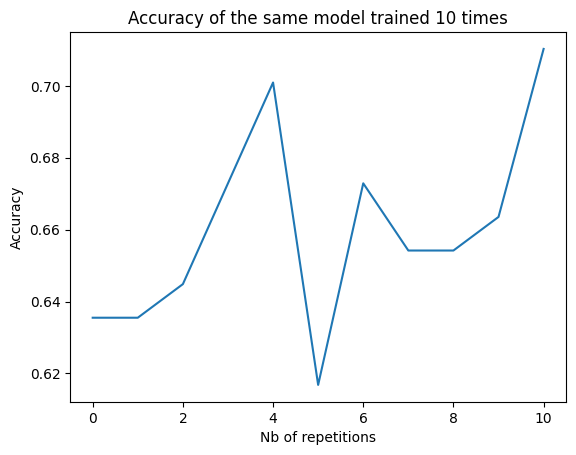

In [134]:
acc_test13_no_dropout = []
nb13_no_dropout=[]
for i in range(11):
    acc = train_lstm_model_loo_full_resample(X_total, y_total, 6, 13, 0.1)
    acc_test13_no_dropout.append(acc)
    nb13_no_dropout.append(i)

plt.xlabel('Nb of repetitions')
plt.ylabel('Accuracy')
plt.title('Accuracy of the same model trained 10 times')
plt.plot(nb13_no_dropout,acc_test13_no_dropout)

Let's decrease the number of neurons to avoid overfitting

In [143]:
from tensorflow.keras.optimizers import Adam

# Same function with resampling:
def train_lstm_model_loo_full_resample(X_total, y_total, num_sub, num_epochs, lr):
    '''
    X_total : dataframe which contains the time series 
    y_total : array which contains the classes associated with the time series
    num_sub : number of the subject used as test set
    num_epochs : number of epochs for training
    indices : indices of the lines of X_total corresponding to each subject
    '''
    
    # Récupération des indices des observations pour chaque sujet
    sub_indices = {sub: i for i, sub in enumerate([3, 5, 6, 7, 8])}
    test_sub = sub_indices[num_sub]

    # Définir l'index pour le test et l'entraînement en utilisant les indices préparés
    X_train_temp, X_test_temp = X_total[X_total['indices'] != test_sub], X_total[X_total['indices'] == test_sub]
    y_train_temp, y_test_temp = y_total[X_total['indices'] != test_sub], y_total[X_total['indices'] == test_sub]

    #Drop column 'indices'
    X_train_temp = X_train_temp.drop('indices', axis=1)
    X_test_temp = X_test_temp.drop('indices', axis=1)

    #Increase the size of the training dataset 
    ros = RandomOverSampler(random_state=42)
    X_train_temp, y_train_temp = ros.fit_resample(X_train_temp, y_train_temp)
    print(pd.Series(y_train_temp).value_counts())

    
    n_timesteps = len(X_train_temp.iloc[0, 0])
    n_features = X_train_temp.shape[1]

    # Reshape of X_train
    X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
    X_train = X_train.reshape(-1, n_timesteps, n_features)


    # Reshape of X_test
    X_test = np.array(X_test_temp.applymap(np.array).values.tolist())
    X_test = X_test.reshape(-1, n_timesteps, n_features)
    
    # Encodage des labels de sortie
    le = LabelEncoder()
    le.fit(y_total)
    y_train_encoded = le.transform(y_train_temp)
    y_test_encoded = le.transform(y_test_temp)
    y_train = to_categorical(y_train_encoded)  # Conversion en format catégoriel pour le softmax
    y_test = to_categorical(y_test_encoded)

    #Model with skip connections:
    input_tensor = Input(shape=(n_timesteps, n_features))
    x = Masking(mask_value=0.0)(input_tensor) #Masking layer to ignore the 0. introduced with padding
    x = LSTM(25, return_sequences=True)(x)
    #x = Dropout(0.2)(x)
    x2 = LSTM(25)(x)
    #x2 = Dropout(0.2)(x2)
    x1 = Dense(50, activation='relu')(x[:, -1, :])  # Utilisation de la dernière sortie du premier LSTM, Connexion directe depuis la sortie du premier LSTM 
    concat = concatenate([x1, x2])

    #Couche Dense finale pour la classification
    output_tensor = Dense(len(np.unique(y_train_encoded)), activation='softmax')(concat)

    # Création du modèle
    model = Model(inputs=input_tensor, outputs=output_tensor)
    
    learning_rate = lr
    optimizer = Adam(learning_rate=learning_rate)

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Configuration de l'arrêt précoce
    early_stopping_monitor = EarlyStopping(
        monitor='val_loss',
        min_delta=0.001,
        patience=10,
        verbose=1,
        mode='auto',
        restore_best_weights=True
    )


    # Entraînement du modèle avec validation sur une fraction des données d'entraînement
    #X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

    # Fonction pour convertir les labels catégoriels en labels originaux et compter les occurrences
    def count_labels(y):
        labels = np.argmax(y, axis=1)  # Convertir de one-hot à labels originaux
        label_counts = np.unique(labels, return_counts=True)
        class_counts = {le.classes_[i]: count for i, count in zip(label_counts[0], label_counts[1])}
        return class_counts

    # Compter et afficher les occurrences pour chaque ensemble
    y_train_counts = count_labels(y_train)
    y_test_counts = count_labels(y_test)
    #y_val_counts = count_labels(y_val)

    print("y_train counts:", y_train_counts)
    print("y_test counts:", y_test_counts)
    #print("y_val counts:", y_val_counts)
    
    #model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, callbacks=[early_stopping_monitor])gg
    model.fit(X_train, y_train, epochs=num_epochs, batch_size=32)

         # Prédiction sur l'ensemble de test et calcul de l'accuracy
    y_pred_prob = model.predict(X_test)
    y_pred_labels = np.argmax(y_pred_prob, axis=1)
    y_test_labels = np.argmax(y_test, axis=1)
    accuracy = accuracy_score(y_test_labels, y_pred_labels)

    print("Test Accuracy:", accuracy)


    # Print for each class if it managed to predict or not
    # Calculer la matrice de confusion
    cm = confusion_matrix(y_test_labels, y_pred_labels)

    print(cm)

    # Obtenir les étiquettes de classe à partir de l'encodeur
    class_labels = le.classes_  # le est votre LabelEncoder

    # Initialisation du dictionnaire pour stocker les résultats
    correct_counts = {label: 0 for label in class_labels}
    total_counts = {label: 0 for label in class_labels}

    # Compter les totaux et les corrects pour chaque classe
    for true_label, pred_label in zip(y_test_labels, y_pred_labels):
        true_class = class_labels[true_label]
        total_counts[true_class] += 1
        if true_label == pred_label:
            correct_counts[true_class] += 1

    # Calculer les fractions de corrects/totaux pour chaque classe
    accuracy_dict = {label: f"{correct_counts[label]}/{total_counts[label]}" for label in class_labels}

    print("Accuracy for each class:", accuracy_dict)
    
    return accuracy

no                 293
vulnerable user    293
vehicle            293
tree               293
two other cars     293
Name: count, dtype: int64
y_train counts: {'no': 293, 'tree': 293, 'two other cars': 293, 'vehicle': 293, 'vulnerable user': 293}
y_test counts: {'no': 75, 'tree': 1, 'two other cars': 3, 'vehicle': 21, 'vulnerable user': 7}
Epoch 1/15


C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.3357 - loss: 1.5729
Epoch 2/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.4675 - loss: 1.2388
Epoch 3/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5959 - loss: 1.0152
Epoch 4/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7123 - loss: 0.7421
Epoch 5/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7747 - loss: 0.6171
Epoch 6/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7938 - loss: 0.5082
Epoch 7/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7875 - loss: 0.5004
Epoch 8/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7987 - loss: 0.4521
Epoch 9/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8132 - loss: 0.4275
Epoch 10/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8305 - loss: 0.4006
Epoch 11/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8186 - loss: 0.4295
Epoch 12/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8306 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.2991 - loss: 1.5858
Epoch 2/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.4948 - loss: 1.3070
Epoch 3/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.6600 - loss: 0.9585
Epoch 4/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7329 - loss: 0.7035
Epoch 5/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7585 - loss: 0.5567
Epoch 6/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7859 - loss: 0.5116
Epoch 7/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7889 - loss: 0.4804
Epoch 8/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8062 - loss: 0.4658
Epoch 9/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7976 - loss: 0.4632
Epoch 10/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8307 - loss: 0.4220
Epoch 11/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8277 - loss: 0.4188
Epoch 12/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8487 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.2915 - loss: 1.5903
Epoch 2/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.5047 - loss: 1.2847
Epoch 3/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.5897 - loss: 1.0262
Epoch 4/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.6672 - loss: 0.8077
Epoch 5/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7734 - loss: 0.6016
Epoch 6/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7978 - loss: 0.5321
Epoch 7/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7885 - loss: 0.5120
Epoch 8/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8087 - loss: 0.4734
Epoch 9/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8151 - loss: 0.4647
Epoch 10/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8104 - loss: 0.4370
Epoch 11/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8351 - loss: 0.3995
Epoch 12/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8343 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.3400 - loss: 1.5809
Epoch 2/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.4889 - loss: 1.3188
Epoch 3/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6874 - loss: 0.9023
Epoch 4/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7516 - loss: 0.6784
Epoch 5/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7843 - loss: 0.5416
Epoch 6/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7848 - loss: 0.5225
Epoch 7/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8132 - loss: 0.4645
Epoch 8/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8032 - loss: 0.4791
Epoch 9/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8242 - loss: 0.4485
Epoch 10/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8193 - loss: 0.4522
Epoch 11/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8515 - loss: 0.3799
Epoch 12/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8569 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.3011 - loss: 1.5872
Epoch 2/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.4326 - loss: 1.3484
Epoch 3/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6471 - loss: 0.9301
Epoch 4/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7413 - loss: 0.6398
Epoch 5/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7464 - loss: 0.5882
Epoch 6/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7916 - loss: 0.5334
Epoch 7/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7936 - loss: 0.4902
Epoch 8/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8280 - loss: 0.4691
Epoch 9/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8125 - loss: 0.4458
Epoch 10/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8281 - loss: 0.4425
Epoch 11/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8182 - loss: 0.4100
Epoch 12/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8339 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.3169 - loss: 1.5826
Epoch 2/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.5224 - loss: 1.3418
Epoch 3/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6742 - loss: 0.9531
Epoch 4/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6989 - loss: 0.6858
Epoch 5/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7632 - loss: 0.6041
Epoch 6/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7945 - loss: 0.5098
Epoch 7/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8014 - loss: 0.4809
Epoch 8/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7939 - loss: 0.4912
Epoch 9/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8217 - loss: 0.4474
Epoch 10/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8180 - loss: 0.4812
Epoch 11/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8212 - loss: 0.4592
Epoch 12/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8314 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.2523 - loss: 1.5917
Epoch 2/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.4969 - loss: 1.2977
Epoch 3/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.5787 - loss: 1.0235
Epoch 4/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7159 - loss: 0.7814
Epoch 5/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7306 - loss: 0.6668
Epoch 6/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7596 - loss: 0.5859
Epoch 7/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7638 - loss: 0.5659
Epoch 8/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7782 - loss: 0.5365
Epoch 9/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7794 - loss: 0.4932
Epoch 10/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8163 - loss: 0.4893
Epoch 11/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8201 - loss: 0.4461
Epoch 12/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8477 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.2726 - loss: 1.5889
Epoch 2/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.4761 - loss: 1.4301
Epoch 3/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6089 - loss: 0.9524
Epoch 4/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7319 - loss: 0.6820
Epoch 5/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7642 - loss: 0.5706
Epoch 6/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7978 - loss: 0.4930
Epoch 7/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7870 - loss: 0.5303
Epoch 8/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8037 - loss: 0.4620
Epoch 9/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7948 - loss: 0.4674
Epoch 10/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8276 - loss: 0.4277
Epoch 11/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8070 - loss: 0.4439
Epoch 12/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8386 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.3394 - loss: 1.5823
Epoch 2/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.5395 - loss: 1.3612
Epoch 3/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.6538 - loss: 0.8840
Epoch 4/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7292 - loss: 0.6670
Epoch 5/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7627 - loss: 0.5774
Epoch 6/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7957 - loss: 0.5265
Epoch 7/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7914 - loss: 0.5002
Epoch 8/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8174 - loss: 0.4636
Epoch 9/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8107 - loss: 0.4445
Epoch 10/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8452 - loss: 0.4294
Epoch 11/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8411 - loss: 0.4135
Epoch 12/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8395 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.3495 - loss: 1.5917
Epoch 2/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.5907 - loss: 1.2935
Epoch 3/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7070 - loss: 0.8361
Epoch 4/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7677 - loss: 0.6112
Epoch 5/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8103 - loss: 0.5263
Epoch 6/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7991 - loss: 0.4929
Epoch 7/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8275 - loss: 0.4469
Epoch 8/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8190 - loss: 0.4280
Epoch 9/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8268 - loss: 0.4244
Epoch 10/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8106 - loss: 0.4363
Epoch 11/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8523 - loss: 0.3835
Epoch 12/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8565 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.2770 - loss: 1.5874
Epoch 2/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.4598 - loss: 1.3294
Epoch 3/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6459 - loss: 0.9154
Epoch 4/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6952 - loss: 0.7278
Epoch 5/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7369 - loss: 0.6238
Epoch 6/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7406 - loss: 0.5741
Epoch 7/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7762 - loss: 0.5383
Epoch 8/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7650 - loss: 0.5834
Epoch 9/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7662 - loss: 0.5354
Epoch 10/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7949 - loss: 0.4884
Epoch 11/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8008 - loss: 0.4676
Epoch 12/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8170 - l

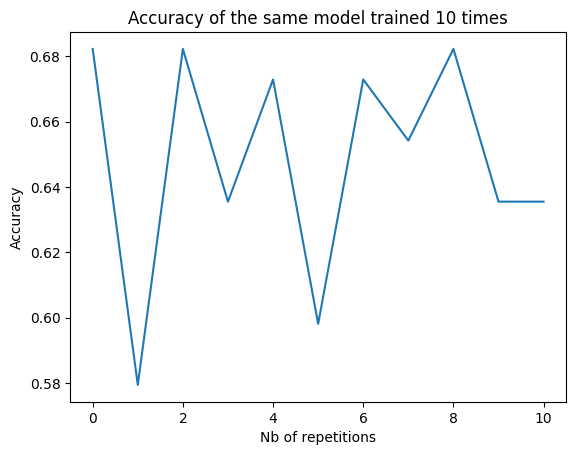

In [149]:
acc_test13_no_dropout_25 = []
nb13_no_dropout_25=[]
for i in range(11):
    acc = train_lstm_model_loo_full_resample(X_total, y_total, 6, 15, 0.1)
    acc_test13_no_dropout_25.append(acc)
    nb13_no_dropout_25.append(i)

plt.xlabel('Nb of repetitions')
plt.ylabel('Accuracy')
plt.title('Accuracy of the same model trained 10 times')
plt.plot(nb13_no_dropout_25,acc_test13_no_dropout_25)

In [153]:
accuracies2=[]
nb_epochs2 = []
for i in range(3,100,5):
    acc = train_lstm_model_loo_full_resample(X_total, y_total, 6, i, 0.01)
    accuracies2.append(acc)
    nb_epochs2.append(i)

no                 293
vulnerable user    293
vehicle            293
tree               293
two other cars     293
Name: count, dtype: int64
y_train counts: {'no': 293, 'tree': 293, 'two other cars': 293, 'vehicle': 293, 'vulnerable user': 293}
y_test counts: {'no': 75, 'tree': 1, 'two other cars': 3, 'vehicle': 21, 'vulnerable user': 7}
Epoch 1/3


C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.2897 - loss: 1.5925
Epoch 2/3
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.4933 - loss: 1.3513
Epoch 3/3
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6389 - loss: 0.9657
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step
Test Accuracy: 0.5233644859813084
[[45  6 10 14  0]
 [ 0  1  0  0  0]
 [ 3  0  0  0  0]
 [ 3  8  0  9  1]
 [ 1  1  0  4  1]]
Accuracy for each class: {'no': '45/75', 'tree': '1/1', 'two other cars': '0/3', 'vehicle': '9/21', 'vulnerable user': '1/7'}
no                 293
vulnerable user    293
vehicle            293
tree               293
two other cars     293
Name: count, dtype: int64
y_train counts: {'no': 293, 'tree': 293, 'two other cars': 293, 'vehicle': 293, 'vulnerable user': 293}
y_test counts: {'no': 75, 'tree': 1, 'two other cars': 3, 'vehicle': 21, 'vulnerable user': 7}
Epoch 1/8


C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.2518 - loss: 1.5999
Epoch 2/8
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.4630 - loss: 1.3404
Epoch 3/8
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6093 - loss: 0.9627
Epoch 4/8
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7107 - loss: 0.7236
Epoch 5/8
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7282 - loss: 0.6387
Epoch 6/8
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7821 - loss: 0.5233
Epoch 7/8
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7865 - loss: 0.4926
Epoch 8/8
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7944 - loss: 0.4800
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step
Test Accuracy: 0.6542056074766355
[[54  4  2 12  3]
 [ 0  1  0  0  0]
 [ 3  0  0  0  0]
 [ 2  3  0 10  6]
 [ 0  0  0  2  5]]
Accuracy for each class: {'no': '54/75', 'tree': '1/1', 'two other cars': '0/3', 'vehicle': '10/21', 'vulnerable user': '5/7'}
no                 293
vulnerable user    293
ve

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.3465 - loss: 1.5865
Epoch 2/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.5467 - loss: 1.3615
Epoch 3/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.6879 - loss: 0.8758
Epoch 4/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7549 - loss: 0.6392
Epoch 5/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7792 - loss: 0.5444
Epoch 6/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.7881 - loss: 0.5127
Epoch 7/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7863 - loss: 0.4989
Epoch 8/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7912 - loss: 0.4852
Epoch 9/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7912 - loss: 0.4803
Epoch 10/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8202 - loss: 0.4249
Epoch 11/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8410 - loss: 0.4042
Epoch 12/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8119 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.2332 - loss: 1.5864
Epoch 2/18
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.5086 - loss: 1.3042
Epoch 3/18
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.6401 - loss: 0.9803
Epoch 4/18
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7154 - loss: 0.7177
Epoch 5/18
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7560 - loss: 0.6063
Epoch 6/18
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7660 - loss: 0.5603
Epoch 7/18
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.7748 - loss: 0.5273
Epoch 8/18
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7869 - loss: 0.4871
Epoch 9/18
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8014 - loss: 0.4558
Epoch 10/18
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7974 - loss: 0.4704
Epoch 11/18
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8016 - loss: 0.4640
Epoch 12/18
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8426 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.2928 - loss: 1.5819
Epoch 2/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.5180 - loss: 1.2700
Epoch 3/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.6037 - loss: 0.9927
Epoch 4/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.6978 - loss: 0.7945
Epoch 5/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7430 - loss: 0.6350
Epoch 6/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7785 - loss: 0.5392
Epoch 7/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7933 - loss: 0.4801
Epoch 8/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7970 - loss: 0.4831
Epoch 9/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8162 - loss: 0.4465
Epoch 10/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8296 - loss: 0.4345
Epoch 11/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8121 - loss: 0.4415
Epoch 12/23
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8317 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.2941 - loss: 1.5909
Epoch 2/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.5393 - loss: 1.3370
Epoch 3/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7185 - loss: 0.8674
Epoch 4/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7556 - loss: 0.6402
Epoch 5/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7658 - loss: 0.5477
Epoch 6/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8028 - loss: 0.4988
Epoch 7/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7791 - loss: 0.5029
Epoch 8/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8067 - loss: 0.4591
Epoch 9/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7595 - loss: 0.5700
Epoch 10/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7797 - loss: 0.4712
Epoch 11/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8162 - loss: 0.4355
Epoch 12/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8071 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.3449 - loss: 1.5903
Epoch 2/33
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.5669 - loss: 1.2845
Epoch 3/33
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.6286 - loss: 0.8776
Epoch 4/33
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7145 - loss: 0.6674
Epoch 5/33
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7542 - loss: 0.5884
Epoch 6/33
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7619 - loss: 0.5711
Epoch 7/33
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7911 - loss: 0.4907
Epoch 8/33
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8338 - loss: 0.4353
Epoch 9/33
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8071 - loss: 0.4264
Epoch 10/33
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8189 - loss: 0.4346
Epoch 11/33
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8364 - loss: 0.4133
Epoch 12/33
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8201 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.3057 - loss: 1.5804
Epoch 2/38
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.4667 - loss: 1.2824
Epoch 3/38
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6001 - loss: 0.9798
Epoch 4/38
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6926 - loss: 0.7735
Epoch 5/38
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7705 - loss: 0.5970
Epoch 6/38
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7938 - loss: 0.5311
Epoch 7/38
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7970 - loss: 0.4990
Epoch 8/38
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7953 - loss: 0.4674
Epoch 9/38
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8193 - loss: 0.4435
Epoch 10/38
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8203 - loss: 0.4216
Epoch 11/38
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8273 - loss: 0.3933
Epoch 12/38
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8494 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.3350 - loss: 1.5843
Epoch 2/43
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.5127 - loss: 1.3030
Epoch 3/43
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6426 - loss: 0.9286
Epoch 4/43
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7383 - loss: 0.7074
Epoch 5/43
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7412 - loss: 0.6143
Epoch 6/43
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7743 - loss: 0.5860
Epoch 7/43
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7699 - loss: 0.5473
Epoch 8/43
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7870 - loss: 0.5065
Epoch 9/43
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7947 - loss: 0.5078
Epoch 10/43
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8006 - loss: 0.4943
Epoch 11/43
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7986 - loss: 0.4777
Epoch 12/43
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8120 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.3303 - loss: 1.5850
Epoch 2/48
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.5026 - loss: 1.2759
Epoch 3/48
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6753 - loss: 0.8357
Epoch 4/48
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7433 - loss: 0.6506
Epoch 5/48
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7632 - loss: 0.5819
Epoch 6/48
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7743 - loss: 0.5349
Epoch 7/48
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7793 - loss: 0.5192
Epoch 8/48
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8039 - loss: 0.4886
Epoch 9/48
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8207 - loss: 0.4599
Epoch 10/48
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8485 - loss: 0.4099
Epoch 11/48
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8572 - loss: 0.4223
Epoch 12/48
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8676 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.3560 - loss: 1.5907
Epoch 2/53
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.5205 - loss: 1.2958
Epoch 3/53
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6946 - loss: 0.8300
Epoch 4/53
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7513 - loss: 0.6222
Epoch 5/53
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7843 - loss: 0.5831
Epoch 6/53
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7867 - loss: 0.5342
Epoch 7/53
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8046 - loss: 0.4918
Epoch 8/53
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7964 - loss: 0.4756
Epoch 9/53
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7994 - loss: 0.4683
Epoch 10/53
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8232 - loss: 0.4324
Epoch 11/53
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8234 - loss: 0.4454
Epoch 12/53
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8538 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.3646 - loss: 1.5791
Epoch 2/58
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.4802 - loss: 1.2858
Epoch 3/58
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6267 - loss: 0.9951
Epoch 4/58
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7158 - loss: 0.7446
Epoch 5/58
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7373 - loss: 0.6468
Epoch 6/58
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7634 - loss: 0.5540
Epoch 7/58
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7801 - loss: 0.5206
Epoch 8/58
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8104 - loss: 0.4732
Epoch 9/58
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7895 - loss: 0.5114
Epoch 10/58
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8319 - loss: 0.4357
Epoch 11/58
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8278 - loss: 0.4331
Epoch 12/58
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8477 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.3497 - loss: 1.5836
Epoch 2/63
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.5286 - loss: 1.3093
Epoch 3/63
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6688 - loss: 0.8771
Epoch 4/63
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7430 - loss: 0.6544
Epoch 5/63
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7783 - loss: 0.5264
Epoch 6/63
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7895 - loss: 0.5314
Epoch 7/63
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8150 - loss: 0.4521
Epoch 8/63
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7993 - loss: 0.4567
Epoch 9/63
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8127 - loss: 0.4491
Epoch 10/63
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8338 - loss: 0.4017
Epoch 11/63
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8325 - loss: 0.4051
Epoch 12/63
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8369 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.3143 - loss: 1.5867
Epoch 2/68
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.4480 - loss: 1.3174
Epoch 3/68
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.5891 - loss: 0.9310
Epoch 4/68
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6974 - loss: 0.7115
Epoch 5/68
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7384 - loss: 0.6447
Epoch 6/68
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7829 - loss: 0.5527
Epoch 7/68
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7832 - loss: 0.5258
Epoch 8/68
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7852 - loss: 0.5214
Epoch 9/68
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8034 - loss: 0.4658
Epoch 10/68
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8119 - loss: 0.4632
Epoch 11/68
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8150 - loss: 0.4747
Epoch 12/68
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8335 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.2792 - loss: 1.5865
Epoch 2/73
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.5010 - loss: 1.3687
Epoch 3/73
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.6260 - loss: 0.9192
Epoch 4/73
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7471 - loss: 0.6578
Epoch 5/73
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7880 - loss: 0.5445
Epoch 6/73
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8065 - loss: 0.4687
Epoch 7/73
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7809 - loss: 0.5086
Epoch 8/73
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8171 - loss: 0.4545
Epoch 9/73
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8248 - loss: 0.4418
Epoch 10/73
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8182 - loss: 0.4103
Epoch 11/73
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8338 - loss: 0.3983
Epoch 12/73
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8333 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.2828 - loss: 1.5865
Epoch 2/78
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.4959 - loss: 1.3052
Epoch 3/78
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6731 - loss: 0.9226
Epoch 4/78
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7438 - loss: 0.6914
Epoch 5/78
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7528 - loss: 0.5857
Epoch 6/78
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7685 - loss: 0.5615
Epoch 7/78
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7893 - loss: 0.5014
Epoch 8/78
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8177 - loss: 0.4696
Epoch 9/78
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8105 - loss: 0.4511
Epoch 10/78
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8167 - loss: 0.4304
Epoch 11/78
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8469 - loss: 0.3977
Epoch 12/78
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8319 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.3702 - loss: 1.5819
Epoch 2/83
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.5643 - loss: 1.2511
Epoch 3/83
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7153 - loss: 0.8732
Epoch 4/83
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7382 - loss: 0.6986
Epoch 5/83
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7575 - loss: 0.6142
Epoch 6/83
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7909 - loss: 0.5338
Epoch 7/83
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8068 - loss: 0.4943
Epoch 8/83
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7910 - loss: 0.5368
Epoch 9/83
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8216 - loss: 0.4686
Epoch 10/83
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8275 - loss: 0.4419
Epoch 11/83
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8299 - loss: 0.4198
Epoch 12/83
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8570 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.3883 - loss: 1.5730
Epoch 2/88
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.5573 - loss: 1.2110
Epoch 3/88
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.6421 - loss: 0.9007
Epoch 4/88
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7170 - loss: 0.7188
Epoch 5/88
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7512 - loss: 0.5970
Epoch 6/88
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7728 - loss: 0.5233
Epoch 7/88
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7710 - loss: 0.5322
Epoch 8/88
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7799 - loss: 0.5024
Epoch 9/88
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8058 - loss: 0.4816
Epoch 10/88
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8058 - loss: 0.4600
Epoch 11/88
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8204 - loss: 0.4493
Epoch 12/88
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8215 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.3228 - loss: 1.5903
Epoch 2/93
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.4570 - loss: 1.3440
Epoch 3/93
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.6312 - loss: 0.8933
Epoch 4/93
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.7273 - loss: 0.6713
Epoch 5/93
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.7269 - loss: 0.6598
Epoch 6/93
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.7725 - loss: 0.5424
Epoch 7/93
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.7582 - loss: 0.5652
Epoch 8/93
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.8048 - loss: 0.4749
Epoch 9/93
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.7955 - loss: 0.4823
Epoch 10/93
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8011 - loss: 0.4523
Epoch 11/93
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.7947 - loss: 0.4545
Epoch 12/93
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8297 - 

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.3617 - loss: 1.5871
Epoch 2/98
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.4651 - loss: 1.2636
Epoch 3/98
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.6152 - loss: 1.0107
Epoch 4/98
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.6993 - loss: 0.8208
Epoch 5/98
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.7581 - loss: 0.6464
Epoch 6/98
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.7562 - loss: 0.6152
Epoch 7/98
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.7808 - loss: 0.5478
Epoch 8/98
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8154 - loss: 0.4581
Epoch 9/98
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.7967 - loss: 0.5114
Epoch 10/98
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8049 - loss: 0.4784
Epoch 11/98
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8038 - loss: 0.4555
Epoch 12/98
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8102 - l

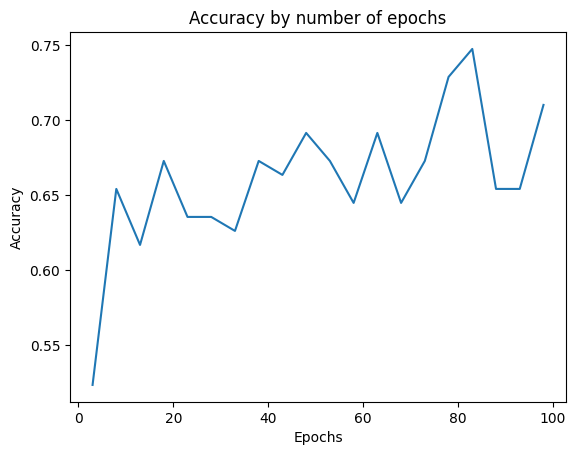

In [154]:
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy by number of epochs')
plt.plot(nb_epochs2,accuracies2)


In [177]:
from tensorflow.keras.optimizers import Adam
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.initializers import GlorotUniform
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report
import seaborn as sns


random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

# Same function with resampling:
def train_lstm_model_loo_full_resample(X_total, y_total, num_sub, num_epochs, lr):
    '''
    X_total : dataframe which contains the time series 
    y_total : array which contains the classes associated with the time series
    num_sub : number of the subject used as test set
    num_epochs : number of epochs for training
    indices : indices of the lines of X_total corresponding to each subject
    '''
    
    # Récupération des indices des observations pour chaque sujet
    sub_indices = {sub: i for i, sub in enumerate([3, 5, 6, 7, 8])}
    test_sub = sub_indices[num_sub]

    # Définir l'index pour le test et l'entraînement en utilisant les indices préparés
    X_train_temp, X_test_temp = X_total[X_total['indices'] != test_sub], X_total[X_total['indices'] == test_sub]
    y_train_temp, y_test_temp = y_total[X_total['indices'] != test_sub], y_total[X_total['indices'] == test_sub]

    #Drop column 'indices'
    X_train_temp = X_train_temp.drop('indices', axis=1)
    X_test_temp = X_test_temp.drop('indices', axis=1)

    #Increase the size of the training dataset 
    ros = RandomOverSampler(random_state=42)
    X_train_temp, y_train_temp = ros.fit_resample(X_train_temp, y_train_temp)

    
    n_timesteps = len(X_train_temp.iloc[0, 0])
    n_features = X_train_temp.shape[1]

    # Reshape of X_train
    X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
    X_train = X_train.reshape(-1, n_timesteps, n_features)


    # Reshape of X_test
    X_test = np.array(X_test_temp.applymap(np.array).values.tolist())
    X_test = X_test.reshape(-1, n_timesteps, n_features)
    
    # Encodage des labels de sortie
    le = LabelEncoder()
    le.fit(y_total)
    y_train_encoded = le.transform(y_train_temp)
    y_test_encoded = le.transform(y_test_temp)
    y_train = to_categorical(y_train_encoded)  # Conversion en format catégoriel pour le softmax
    y_test = to_categorical(y_test_encoded)

    glorot_initializer = GlorotUniform(seed=0)


    #Model with skip connections:
    input_tensor = Input(shape=(n_timesteps, n_features))
    x = Masking(mask_value=0.0)(input_tensor) #Masking layer to ignore the 0. introduced with padding
    x = LSTM(25, return_sequences=True, kernel_initializer=glorot_initializer)(x)
    x2 = LSTM(25, kernel_initializer=glorot_initializer)(x)
    x1 = Dense(50, activation='relu', kernel_initializer=glorot_initializer)(x[:, -1, :])  # Utilisation de la dernière sortie du premier LSTM, Connexion directe depuis la sortie du premier LSTM 
    concat = concatenate([x1, x2])
    output_tensor = Dense(len(np.unique(y_train_encoded)), activation='softmax', kernel_initializer=glorot_initializer)(concat)

    # Création du modèle
    model = Model(inputs=input_tensor, outputs=output_tensor)
    
    learning_rate = lr
    optimizer = Adam(learning_rate=learning_rate)

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=num_epochs, batch_size=32)

    # Prédiction sur l'ensemble de test et calcul de l'accuracy
    y_pred_prob = model.predict(X_test)
    y_pred_labels = np.argmax(y_pred_prob, axis=1)
    y_test_labels = np.argmax(y_test, axis=1)

    # Print for each class if it managed to predict or not
    # Calculer la matrice de confusion
    cm = confusion_matrix(y_test_labels, y_pred_labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    print("\nClassification Report:\n", classification_report(y_test_labels, y_pred_labels, target_names=le.classes_))

    # # Obtenir les étiquettes de classe à partir de l'encodeur
    # class_labels = le.classes_  # le est votre LabelEncoder

    # # Initialisation du dictionnaire pour stocker les résultats
    # correct_counts = {label: 0 for label in class_labels}
    # total_counts = {label: 0 for label in class_labels}

    # # Compter les totaux et les corrects pour chaque classe
    # for true_label, pred_label in zip(y_test_labels, y_pred_labels):
    #     true_class = class_labels[true_label]
    #     total_counts[true_class] += 1
    #     if true_label == pred_label:
    #         correct_counts[true_class] += 1

    # # Calculer les fractions de corrects/totaux pour chaque classe
    # accuracy_dict = {label: f"{correct_counts[label]}/{total_counts[label]}" for label in class_labels}

    # print("Accuracy for each class:", accuracy_dict)
    
    return cm

Epoch 1/15


C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2335394778.py:45: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2335394778.py:50: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.2556 - loss: 1.5918
Epoch 2/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.4524 - loss: 1.3247
Epoch 3/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.6019 - loss: 0.9974
Epoch 4/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.6805 - loss: 0.7849
Epoch 5/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7274 - loss: 0.6447
Epoch 6/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7507 - loss: 0.5891
Epoch 7/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7867 - loss: 0.5381
Epoch 8/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7937 - loss: 0.5199
Epoch 9/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8080 - loss: 0.4788
Epoch 10/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8188 - loss: 0.4589
Epoch 11/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8174 - loss: 0.4460
Epoch 12/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8218 - l

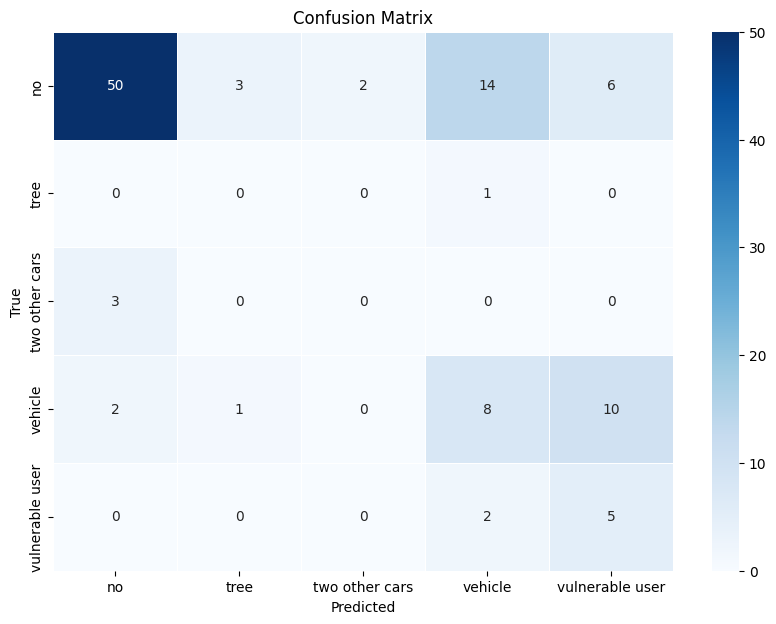


Classification Report:
                  precision    recall  f1-score   support

             no       0.91      0.67      0.77        75
           tree       0.00      0.00      0.00         1
 two other cars       0.00      0.00      0.00         3
        vehicle       0.32      0.38      0.35        21
vulnerable user       0.24      0.71      0.36         7

       accuracy                           0.59       107
      macro avg       0.29      0.35      0.29       107
   weighted avg       0.72      0.59      0.63       107



array([[50,  3,  2, 14,  6],
       [ 0,  0,  0,  1,  0],
       [ 3,  0,  0,  0,  0],
       [ 2,  1,  0,  8, 10],
       [ 0,  0,  0,  2,  5]], dtype=int64)

In [178]:
train_lstm_model_loo_full_resample(X_total, y_total, 6, 15, 0.01)

no                 293
vulnerable user    293
vehicle            293
tree               293
two other cars     293
Name: count, dtype: int64
y_train counts: {'no': 293, 'tree': 293, 'two other cars': 293, 'vehicle': 293, 'vulnerable user': 293}
y_test counts: {'no': 75, 'tree': 1, 'two other cars': 3, 'vehicle': 21, 'vulnerable user': 7}
Epoch 1/15


C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\559346692.py:43: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\559346692.py:48: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.2774 - loss: 1.5938
Epoch 2/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5059 - loss: 1.3218
Epoch 3/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.6588 - loss: 0.9830
Epoch 4/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.7138 - loss: 0.7556
Epoch 5/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7526 - loss: 0.6348
Epoch 6/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7718 - loss: 0.5749
Epoch 7/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7881 - loss: 0.5282
Epoch 8/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.8041 - loss: 0.4966
Epoch 9/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8046 - loss: 0.4763
Epoch 10/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8074 - loss: 0.4627
Epoch 11/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8214 - loss: 0.4426
Epoch 12/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8259 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\559346692.py:43: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\559346692.py:48: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.2561 - loss: 1.5958
Epoch 2/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.5196 - loss: 1.3861
Epoch 3/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6807 - loss: 0.9864
Epoch 4/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.7620 - loss: 0.7152
Epoch 5/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.7601 - loss: 0.5621
Epoch 6/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.7852 - loss: 0.5050
Epoch 7/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.8036 - loss: 0.4729
Epoch 8/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8141 - loss: 0.4478
Epoch 9/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8217 - loss: 0.4327
Epoch 10/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8296 - loss: 0.4134
Epoch 11/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8417 - loss: 0.3985
Epoch 12/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8433 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\559346692.py:43: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\559346692.py:48: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.2760 - loss: 1.5922
Epoch 2/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.5246 - loss: 1.3395
Epoch 3/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.7024 - loss: 0.8998
Epoch 4/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.7257 - loss: 0.6700
Epoch 5/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.7566 - loss: 0.5733
Epoch 6/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.7686 - loss: 0.5305
Epoch 7/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.7814 - loss: 0.4945
Epoch 8/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.7775 - loss: 0.4732
Epoch 9/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8040 - loss: 0.4562
Epoch 10/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.8053 - loss: 0.4518
Epoch 11/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.8194 - loss: 0.4353
Epoch 12/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.8379 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\559346692.py:43: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\559346692.py:48: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.2685 - loss: 1.5858
Epoch 2/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.4869 - loss: 1.3214
Epoch 3/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.6489 - loss: 0.9688
Epoch 4/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.7092 - loss: 0.7271
Epoch 5/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.7620 - loss: 0.6083
Epoch 6/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.7598 - loss: 0.5748
Epoch 7/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.7674 - loss: 0.5371
Epoch 8/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.7788 - loss: 0.5121
Epoch 9/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.7974 - loss: 0.4878
Epoch 10/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.8044 - loss: 0.4685
Epoch 11/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.8110 - loss: 0.4527
Epoch 12/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.8188 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\559346692.py:43: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\559346692.py:48: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.2666 - loss: 1.5936
Epoch 2/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.5410 - loss: 1.3237
Epoch 3/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.6750 - loss: 0.8843
Epoch 4/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.7466 - loss: 0.6302
Epoch 5/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7615 - loss: 0.5404
Epoch 6/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.7826 - loss: 0.5036
Epoch 7/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7866 - loss: 0.5183
Epoch 8/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8190 - loss: 0.4591
Epoch 9/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.8235 - loss: 0.4433
Epoch 10/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8229 - loss: 0.4253
Epoch 11/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8333 - loss: 0.4062
Epoch 12/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8408 - l

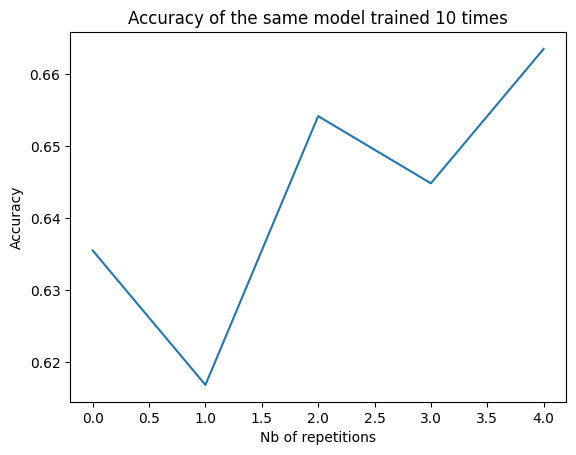

In [174]:
acc_test = []
nb=[]
for i in range(5):
    acc = train_lstm_model_loo_full_resample(X_total, y_total, 6, 15, 0.01)
    acc_test.append(acc)
    nb.append(i)

plt.xlabel('Nb of repetitions')
plt.ylabel('Accuracy')
plt.title('Accuracy of the same model trained 10 times')
plt.plot(nb,acc_test)

In [161]:
# Mean with different subjects:
mean_acc= []
std_acc =[]
epochs = []
for epoch in range(10,30,3):
    epochs.append(epoch)
    acc_list = []
    for i in subject_numbers:
        acc = train_lstm_model_loo_full_resample(X_total, y_total, i, epoch, 0.01)
        acc_list.append(acc)
    mean_acc.append(np.mean(acc_list))
    std_acc.append(np.std(acc_list))


no                 297
vulnerable user    297
vehicle            297
tree               297
two other cars     297
Name: count, dtype: int64
y_train counts: {'no': 297, 'tree': 297, 'two other cars': 297, 'vehicle': 297, 'vulnerable user': 297}
y_test counts: {'no': 71, 'tree': 1, 'two other cars': 1, 'vehicle': 22, 'vulnerable user': 7}
Epoch 1/10


C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.3069 - loss: 1.5963
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.4564 - loss: 1.3373
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.5952 - loss: 1.0468
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7256 - loss: 0.7693
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.7404 - loss: 0.6133
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.7726 - loss: 0.5405
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7921 - loss: 0.5005
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8432 - loss: 0.4190
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8349 - loss: 0.4040
Epoch 10/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8314 - loss: 0.3993
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step
Test Accuracy: 0.5686274509803921
[[45  1  8 13  4]
 [ 0  0  0  1  0]
 [ 1  0  0  0  0]
 [ 3  0  0 12  7]
 [ 0  0  0  6  

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.2626 - loss: 1.5930
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.5534 - loss: 1.2574
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.6336 - loss: 0.8930
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.7408 - loss: 0.6768
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7672 - loss: 0.5864
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7806 - loss: 0.5227
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.7705 - loss: 0.5249
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7848 - loss: 0.4762
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8053 - loss: 0.4797
Epoch 10/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8111 - loss: 0.4479
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step
Test Accuracy: 0.6699029126213593
[[50  2  4 10  6]
 [ 0  0  0  1  0]
 [ 0  0  0  0  0]
 [ 2  2  0 14  5]
 [ 0  0  0  2  

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.3625 - loss: 1.5743
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.4829 - loss: 1.2781
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.6556 - loss: 0.8912
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7206 - loss: 0.6782
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7461 - loss: 0.5917
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7655 - loss: 0.5441
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7771 - loss: 0.5135
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7858 - loss: 0.4910
Epoch 9/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.7972 - loss: 0.4843
Epoch 10/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8181 - loss: 0.4472
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step
Test Accuracy: 0.6074766355140186
[[52  3  3  7 10]
 [ 0  0  0  0  1]
 [ 3  0  0  0  0]
 [ 2  0  0  7 12]
 [ 0  0  0  1  6

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.3366 - loss: 1.5903
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.4140 - loss: 1.3092
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.5809 - loss: 0.9900
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.6543 - loss: 0.8150
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7268 - loss: 0.6667
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7160 - loss: 0.6488
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7727 - loss: 0.5684
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8089 - loss: 0.4914
Epoch 9/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.7967 - loss: 0.4668
Epoch 10/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8063 - loss: 0.4690
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step
Test Accuracy: 0.6216216216216216
[[55  1  3 11  7]
 [ 0  0  0  1  0]
 [ 2  0  0  0  0]
 [ 5  1  0  9  9]
 [ 0  0  0  2  

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.3474 - loss: 1.5699
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.5552 - loss: 1.2277
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.6727 - loss: 0.8950
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7888 - loss: 0.6554
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7981 - loss: 0.5614
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7989 - loss: 0.5165
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8383 - loss: 0.4611
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8445 - loss: 0.4471
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8499 - loss: 0.4068
Epoch 10/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8769 - loss: 0.3708
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step
Test Accuracy: 0.48148148148148145
[[41  3  1 23  5]
 [ 0  0  0  1  0]
 [ 3  0  0  0  0]
 [ 3  0  0 10 11]
 [ 0  0  0  6 

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.3597 - loss: 1.5838
Epoch 2/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.5716 - loss: 1.2592
Epoch 3/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7671 - loss: 0.7855
Epoch 4/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7868 - loss: 0.5818
Epoch 5/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7809 - loss: 0.5083
Epoch 6/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7937 - loss: 0.4832
Epoch 7/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8057 - loss: 0.4802
Epoch 8/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8188 - loss: 0.4283
Epoch 9/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7968 - loss: 0.5051
Epoch 10/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8260 - loss: 0.4090
Epoch 11/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8442 - loss: 0.4074
Epoch 12/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8514 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.2929 - loss: 1.5927
Epoch 2/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.5016 - loss: 1.3612
Epoch 3/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.6225 - loss: 0.9245
Epoch 4/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.6894 - loss: 0.7424
Epoch 5/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7580 - loss: 0.6403
Epoch 6/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7560 - loss: 0.6015
Epoch 7/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7959 - loss: 0.5167
Epoch 8/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8012 - loss: 0.5185
Epoch 9/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8123 - loss: 0.4957
Epoch 10/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8053 - loss: 0.4943
Epoch 11/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8120 - loss: 0.4544
Epoch 12/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8203 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.3208 - loss: 1.5889
Epoch 2/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.5214 - loss: 1.3030
Epoch 3/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6273 - loss: 0.9622
Epoch 4/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7305 - loss: 0.6702
Epoch 5/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7549 - loss: 0.6126
Epoch 6/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7663 - loss: 0.5623
Epoch 7/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7797 - loss: 0.5267
Epoch 8/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.7973 - loss: 0.4985
Epoch 9/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7903 - loss: 0.5104
Epoch 10/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8179 - loss: 0.4337
Epoch 11/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8356 - loss: 0.4223
Epoch 12/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8473 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.2907 - loss: 1.5928
Epoch 2/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.4908 - loss: 1.2884
Epoch 3/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6418 - loss: 0.8250
Epoch 4/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7456 - loss: 0.6298
Epoch 5/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7528 - loss: 0.5394
Epoch 6/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7576 - loss: 0.5912
Epoch 7/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8026 - loss: 0.4889
Epoch 8/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.7969 - loss: 0.4515
Epoch 9/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8081 - loss: 0.4553
Epoch 10/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8268 - loss: 0.4383
Epoch 11/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8242 - loss: 0.4217
Epoch 12/13
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8293 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.3515 - loss: 1.5871
Epoch 2/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.5847 - loss: 1.3415
Epoch 3/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6812 - loss: 0.9585
Epoch 4/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7930 - loss: 0.6541
Epoch 5/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7954 - loss: 0.5930
Epoch 6/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8423 - loss: 0.4621
Epoch 7/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8501 - loss: 0.4165
Epoch 8/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8438 - loss: 0.4180
Epoch 9/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8852 - loss: 0.3377
Epoch 10/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8303 - loss: 0.4325
Epoch 11/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8718 - loss: 0.3453
Epoch 12/13
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8789 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.3728 - loss: 1.5811
Epoch 2/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.5618 - loss: 1.2361
Epoch 3/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6924 - loss: 0.8737
Epoch 4/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7662 - loss: 0.6242
Epoch 5/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7578 - loss: 0.5183
Epoch 6/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7893 - loss: 0.4953
Epoch 7/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8112 - loss: 0.4552
Epoch 8/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8275 - loss: 0.4410
Epoch 9/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8303 - loss: 0.4054
Epoch 10/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8542 - loss: 0.3897
Epoch 11/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8574 - loss: 0.3763
Epoch 12/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8743 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.2756 - loss: 1.5943
Epoch 2/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.4423 - loss: 1.4131
Epoch 3/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6262 - loss: 1.0214
Epoch 4/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6991 - loss: 0.8098
Epoch 5/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7875 - loss: 0.6030
Epoch 6/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7720 - loss: 0.5748
Epoch 7/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7768 - loss: 0.5731
Epoch 8/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7971 - loss: 0.5167
Epoch 9/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7819 - loss: 0.5311
Epoch 10/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8076 - loss: 0.4829
Epoch 11/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8145 - loss: 0.4652
Epoch 12/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8333 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.2740 - loss: 1.5937
Epoch 2/16
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.5910 - loss: 1.3589
Epoch 3/16
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6392 - loss: 0.9316
Epoch 4/16
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7238 - loss: 0.7444
Epoch 5/16
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7274 - loss: 0.6558
Epoch 6/16
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7581 - loss: 0.5844
Epoch 7/16
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7912 - loss: 0.4974
Epoch 8/16
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8052 - loss: 0.4675
Epoch 9/16
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8158 - loss: 0.4679
Epoch 10/16
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8062 - loss: 0.4526
Epoch 11/16
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8052 - loss: 0.4464
Epoch 12/16
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8246 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.3553 - loss: 1.5780
Epoch 2/16
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.5171 - loss: 1.2183
Epoch 3/16
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6421 - loss: 0.8566
Epoch 4/16
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7529 - loss: 0.6371
Epoch 5/16
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7710 - loss: 0.5716
Epoch 6/16
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7959 - loss: 0.4996
Epoch 7/16
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7818 - loss: 0.5129
Epoch 8/16
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7934 - loss: 0.4864
Epoch 9/16
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8188 - loss: 0.4548
Epoch 10/16
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8339 - loss: 0.4510
Epoch 11/16
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8199 - loss: 0.4516
Epoch 12/16
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8521 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.3416 - loss: 1.5933
Epoch 2/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.5966 - loss: 1.3137
Epoch 3/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7047 - loss: 0.7819
Epoch 4/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7885 - loss: 0.6032
Epoch 5/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8162 - loss: 0.5216
Epoch 6/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8366 - loss: 0.4475
Epoch 7/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8532 - loss: 0.4058
Epoch 8/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8442 - loss: 0.4291
Epoch 9/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8473 - loss: 0.3907
Epoch 10/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8719 - loss: 0.3668
Epoch 11/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8790 - loss: 0.3259
Epoch 12/16
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8895 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.3042 - loss: 1.5871
Epoch 2/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.5206 - loss: 1.3151
Epoch 3/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7230 - loss: 0.8360
Epoch 4/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7419 - loss: 0.6457
Epoch 5/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7818 - loss: 0.5362
Epoch 6/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7817 - loss: 0.5128
Epoch 7/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7828 - loss: 0.4733
Epoch 8/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8059 - loss: 0.4405
Epoch 9/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8186 - loss: 0.4605
Epoch 10/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7999 - loss: 0.4673
Epoch 11/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8196 - loss: 0.4068
Epoch 12/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8199 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.3530 - loss: 1.5806
Epoch 2/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.5181 - loss: 1.3198
Epoch 3/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6361 - loss: 0.9346
Epoch 4/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.7403 - loss: 0.6871
Epoch 5/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7419 - loss: 0.6402
Epoch 6/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7726 - loss: 0.5869
Epoch 7/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8043 - loss: 0.4941
Epoch 8/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8270 - loss: 0.4527
Epoch 9/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8193 - loss: 0.4600
Epoch 10/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7776 - loss: 0.5456
Epoch 11/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8181 - loss: 0.4600
Epoch 12/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.8255 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.3159 - loss: 1.5971
Epoch 2/19
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.4216 - loss: 1.3536
Epoch 3/19
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.5710 - loss: 1.0256
Epoch 4/19
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.6840 - loss: 0.7796
Epoch 5/19
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7392 - loss: 0.6478
Epoch 6/19
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7587 - loss: 0.5799
Epoch 7/19
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7430 - loss: 0.5786
Epoch 8/19
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8106 - loss: 0.4956
Epoch 9/19
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8181 - loss: 0.4540
Epoch 10/19
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8092 - loss: 0.4616
Epoch 11/19
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8124 - loss: 0.4419
Epoch 12/19
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7918 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.2905 - loss: 1.5916
Epoch 2/19
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.5499 - loss: 1.3163
Epoch 3/19
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6245 - loss: 0.8870
Epoch 4/19
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7265 - loss: 0.6883
Epoch 5/19
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7214 - loss: 0.6139
Epoch 6/19
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7355 - loss: 0.5466
Epoch 7/19
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7574 - loss: 0.5202
Epoch 8/19
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8026 - loss: 0.4565
Epoch 9/19
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8269 - loss: 0.4271
Epoch 10/19
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8120 - loss: 0.4334
Epoch 11/19
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8026 - loss: 0.4615
Epoch 12/19
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8238 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.3046 - loss: 1.5920
Epoch 2/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.5835 - loss: 1.3264
Epoch 3/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7010 - loss: 0.8686
Epoch 4/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7683 - loss: 0.6604
Epoch 5/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7904 - loss: 0.5600
Epoch 6/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7895 - loss: 0.4947
Epoch 7/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8468 - loss: 0.4423
Epoch 8/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8738 - loss: 0.3619
Epoch 9/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8697 - loss: 0.3656
Epoch 10/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8824 - loss: 0.3430
Epoch 11/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8885 - loss: 0.3426
Epoch 12/19
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8866 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.3461 - loss: 1.5772
Epoch 2/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.5120 - loss: 1.2512
Epoch 3/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6492 - loss: 0.9752
Epoch 4/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7565 - loss: 0.6902
Epoch 5/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7853 - loss: 0.5820
Epoch 6/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8084 - loss: 0.5089
Epoch 7/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8252 - loss: 0.4480
Epoch 8/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8272 - loss: 0.4396
Epoch 9/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8624 - loss: 0.3847
Epoch 10/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8444 - loss: 0.3912
Epoch 11/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8750 - loss: 0.3423
Epoch 12/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8702 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.3370 - loss: 1.5873
Epoch 2/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.5211 - loss: 1.3147
Epoch 3/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6856 - loss: 0.8435
Epoch 4/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7550 - loss: 0.6522
Epoch 5/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7461 - loss: 0.6341
Epoch 6/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7586 - loss: 0.5909
Epoch 7/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7974 - loss: 0.5017
Epoch 8/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7824 - loss: 0.5357
Epoch 9/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7784 - loss: 0.5088
Epoch 10/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8088 - loss: 0.4500
Epoch 11/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8337 - loss: 0.4350
Epoch 12/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8424 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.3204 - loss: 1.5884
Epoch 2/22
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.5477 - loss: 1.2554
Epoch 3/22
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.6010 - loss: 0.9455
Epoch 4/22
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7216 - loss: 0.7626
Epoch 5/22
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7606 - loss: 0.6448
Epoch 6/22
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7700 - loss: 0.5756
Epoch 7/22
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7779 - loss: 0.5130
Epoch 8/22
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8176 - loss: 0.5015
Epoch 9/22
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8270 - loss: 0.4255
Epoch 10/22
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8350 - loss: 0.4430
Epoch 11/22
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8096 - loss: 0.4278
Epoch 12/22
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8472 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.3400 - loss: 1.5818
Epoch 2/22
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.4896 - loss: 1.2736
Epoch 3/22
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.6469 - loss: 0.9021
Epoch 4/22
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.6593 - loss: 0.7472
Epoch 5/22
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7434 - loss: 0.6101
Epoch 6/22
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7780 - loss: 0.5296
Epoch 7/22
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7863 - loss: 0.4887
Epoch 8/22
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8026 - loss: 0.4971
Epoch 9/22
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8075 - loss: 0.4621
Epoch 10/22
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7945 - loss: 0.4674
Epoch 11/22
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8256 - loss: 0.4288
Epoch 12/22
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8041 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.4181 - loss: 1.5757
Epoch 2/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.5720 - loss: 1.2072
Epoch 3/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.7429 - loss: 0.8750
Epoch 4/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7889 - loss: 0.6227
Epoch 5/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7954 - loss: 0.5198
Epoch 6/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8297 - loss: 0.4877
Epoch 7/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8404 - loss: 0.4273
Epoch 8/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8621 - loss: 0.3863
Epoch 9/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8717 - loss: 0.3592
Epoch 10/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8777 - loss: 0.3385
Epoch 11/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8741 - loss: 0.3294
Epoch 12/22
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8854 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.3226 - loss: 1.5879
Epoch 2/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.4740 - loss: 1.2859
Epoch 3/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6103 - loss: 0.9890
Epoch 4/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7261 - loss: 0.7588
Epoch 5/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7822 - loss: 0.5890
Epoch 6/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7948 - loss: 0.4903
Epoch 7/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7943 - loss: 0.5199
Epoch 8/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8133 - loss: 0.4389
Epoch 9/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8436 - loss: 0.4085
Epoch 10/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8651 - loss: 0.3753
Epoch 11/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8637 - loss: 0.3527
Epoch 12/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8707 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.3304 - loss: 1.5820
Epoch 2/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.5064 - loss: 1.2834
Epoch 3/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6519 - loss: 0.8908
Epoch 4/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7458 - loss: 0.6631
Epoch 5/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7591 - loss: 0.5772
Epoch 6/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7664 - loss: 0.5458
Epoch 7/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7783 - loss: 0.5023
Epoch 8/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8009 - loss: 0.4812
Epoch 9/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8028 - loss: 0.4957
Epoch 10/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8122 - loss: 0.4315
Epoch 11/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8070 - loss: 0.4695
Epoch 12/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8315 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.3438 - loss: 1.5806
Epoch 2/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.4870 - loss: 1.2550
Epoch 3/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.5876 - loss: 0.9442
Epoch 4/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7468 - loss: 0.7549
Epoch 5/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7502 - loss: 0.6878
Epoch 6/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7704 - loss: 0.5916
Epoch 7/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7898 - loss: 0.5410
Epoch 8/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8155 - loss: 0.5005
Epoch 9/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8085 - loss: 0.4586
Epoch 10/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8386 - loss: 0.4542
Epoch 11/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8546 - loss: 0.3908
Epoch 12/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8488 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.2986 - loss: 1.5981
Epoch 2/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.4892 - loss: 1.3752
Epoch 3/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6532 - loss: 0.8155
Epoch 4/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7439 - loss: 0.6465
Epoch 5/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7759 - loss: 0.5371
Epoch 6/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7555 - loss: 0.5713
Epoch 7/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7719 - loss: 0.5143
Epoch 8/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7762 - loss: 0.5007
Epoch 9/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8094 - loss: 0.4651
Epoch 10/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7893 - loss: 0.4435
Epoch 11/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8247 - loss: 0.4229
Epoch 12/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8317 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.3567 - loss: 1.5792
Epoch 2/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.5602 - loss: 1.2091
Epoch 3/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6709 - loss: 0.8933
Epoch 4/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7179 - loss: 0.7444
Epoch 5/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7454 - loss: 0.6929
Epoch 6/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8052 - loss: 0.5900
Epoch 7/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8176 - loss: 0.5487
Epoch 8/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8321 - loss: 0.4789
Epoch 9/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8250 - loss: 0.4840
Epoch 10/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8256 - loss: 0.4403
Epoch 11/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8514 - loss: 0.4014
Epoch 12/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8620 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.3423 - loss: 1.5935
Epoch 2/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.4265 - loss: 1.3914
Epoch 3/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.6929 - loss: 1.0221
Epoch 4/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7747 - loss: 0.7291
Epoch 5/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.8099 - loss: 0.5523
Epoch 6/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7792 - loss: 0.5438
Epoch 7/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8079 - loss: 0.4536
Epoch 8/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8074 - loss: 0.4744
Epoch 9/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8249 - loss: 0.4062
Epoch 10/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8233 - loss: 0.4084
Epoch 11/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8769 - loss: 0.3384
Epoch 12/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8810 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.3437 - loss: 1.5888
Epoch 2/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.5449 - loss: 1.2773
Epoch 3/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.6849 - loss: 0.8126
Epoch 4/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7485 - loss: 0.6192
Epoch 5/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7653 - loss: 0.5791
Epoch 6/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7826 - loss: 0.5502
Epoch 7/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8046 - loss: 0.4834
Epoch 8/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7842 - loss: 0.4912
Epoch 9/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8074 - loss: 0.4680
Epoch 10/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8282 - loss: 0.4459
Epoch 11/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8187 - loss: 0.4540
Epoch 12/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8379 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.3057 - loss: 1.5851
Epoch 2/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.4634 - loss: 1.2873
Epoch 3/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.5753 - loss: 0.9809
Epoch 4/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7103 - loss: 0.7476
Epoch 5/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7483 - loss: 0.6042
Epoch 6/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7501 - loss: 0.5750
Epoch 7/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7672 - loss: 0.5312
Epoch 8/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7900 - loss: 0.4843
Epoch 9/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7910 - loss: 0.4752
Epoch 10/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8005 - loss: 0.4417
Epoch 11/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8296 - loss: 0.4137
Epoch 12/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8243 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.2630 - loss: 1.5946
Epoch 2/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.4671 - loss: 1.3547
Epoch 3/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6648 - loss: 0.8643
Epoch 4/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7155 - loss: 0.6566
Epoch 5/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7639 - loss: 0.5593
Epoch 6/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7508 - loss: 0.5569
Epoch 7/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.7812 - loss: 0.5118
Epoch 8/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7904 - loss: 0.5323
Epoch 9/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7941 - loss: 0.5079
Epoch 10/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7917 - loss: 0.4816
Epoch 11/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8004 - loss: 0.4628
Epoch 12/28
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8304 - l

C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = np.array(X_train_temp.applymap(np.array).values.tolist())
C:\Users\hennecol\AppData\Local\Temp\ipykernel_4232\2658829016.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = np.array(X_test_temp.applymap(np.array).values.tolist())


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.3323 - loss: 1.5753
Epoch 2/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.5018 - loss: 1.2368
Epoch 3/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6468 - loss: 0.9534
Epoch 4/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7285 - loss: 0.7634
Epoch 5/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7768 - loss: 0.5888
Epoch 6/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8125 - loss: 0.5089
Epoch 7/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8351 - loss: 0.4505
Epoch 8/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8136 - loss: 0.4714
Epoch 9/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8465 - loss: 0.4126
Epoch 10/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8471 - loss: 0.3948
Epoch 11/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8326 - loss: 0.4183
Epoch 12/28
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8552 - l

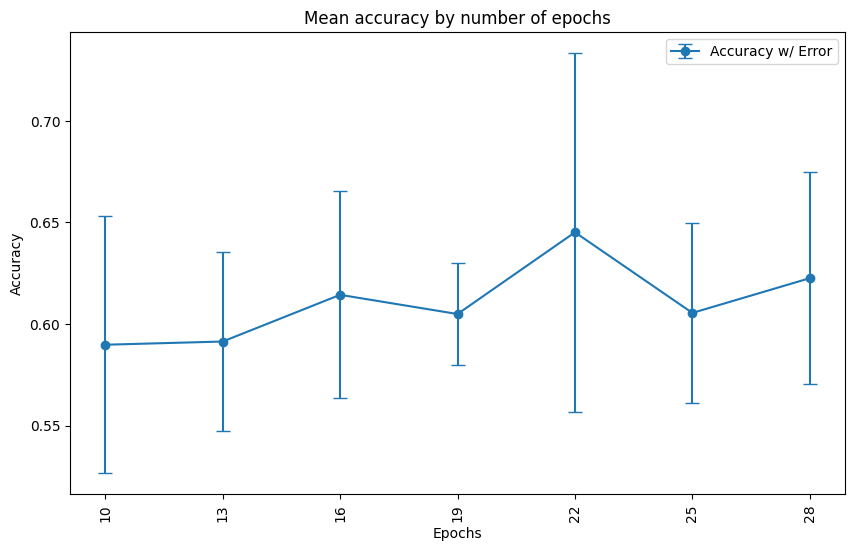

In [162]:
plt.figure(figsize=(10, 6))

# Use errorbar instead of plot for accuracies with error bars
plt.errorbar(epochs, mean_acc, yerr=std_acc, label='Accuracy w/ Error', marker='o', capsize=5)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs, rotation=90) # Assuming features_used is a list of feature counts
plt.title('Mean accuracy by number of epochs')

# Option to add a legend if you want to label the error bars plot
plt.legend()

plt.show()